# Trip Duration EDA

### Table of Contents
1. [Introduction](#introduction)
2. [Data Inspection](#data-inspection)
    - Load dataset  
    - Shape, Info, Describe  
    - Missing values  
    - Data types  
3. [Target Variable Analysis](#target-variable-analysis)
    - Distribution of trip_duration  
    - Log transformation & skewness  
    - Outlier detection  
4. [Univariate Analysis](#univariate-analysis)
    - Numerical features (Histogram, Boxplot)  
    - Categorical features (Countplot, Barplot)  
5. [Bivariate Analysis](#bivariate-analysis)
    - Relation with target trip_duration  (Heatmap, pairplot)
    - Scatterplots & Boxplots  
    - Feature vs Feature  
6. [Datetime Features Analysis](#datetime-features-analysis)
    - Hour of day effect  
    - Day of week effect  
    - Weekday vs Weekend  
    - Time vs Trip duration  
7. [Geospatial Analysis](#geospatial-analysis)
    - Pickup/Dropoff locations visualization  
    - Heatmap of clusters  
    - Distance vs Duration  
8. [Key Findings](#key-findings)
    - Summary of insights  
    - Hypotheses for Feature Engineering


# introduction

### Overview  
This dataset comes from the *NYC Taxi & Limousine Commission (TLC)* and contains information about taxi trips in New York City.  
Each record includes details such as *pickup/dropoff locations, time, passenger count, and vendor information, along with the **trip duration (in seconds)*.

### Objective  
The goal is to *predict the trip duration* of taxi rides using the available features.  
This analysis (EDA) will help us understand the data, detect patterns, and prepare for building predictive models.

# data inspection

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

### load data

In [2]:
df1 = pd.read_csv('train.csv')  #train().zip
df2=pd.read_csv('val.csv')     #val().zip

# Combine df1 and df2 into a single DataFrame
df = pd.concat([df1, df2])

# Reset the index 
df.reset_index(drop=True, inplace=True)

In [3]:
# Check the dimensions (rows, columns) of df1 and df2
df1.shape, df2.shape

((1000000, 10), (229319, 10))

In [4]:
df.shape  # Check the dimensions (rows, columns) of df

(1229319, 10)

We started with two datasets:  

- **Training data** with shape `(1000000, 10)`  
- **Validation data** with shape `229319, 10)`  

We combined them into a single DataFrame called **df**,  
which has the shape `(1229319, 10)`.  


In [5]:
df.sample(20) # Display a random sample of 20 rows from df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
887195,id3949164,2,2016-01-22 19:53:33,6,-73.975586,40.751881,-73.985321,40.738838,N,256
473370,id3902026,2,2016-03-24 07:18:01,1,-73.955544,40.773571,-73.952316,40.789780,N,387
858270,id2121481,1,2016-02-20 08:55:04,1,-73.957802,40.776314,-73.979897,40.781166,N,304
991392,id1880046,1,2016-04-30 15:15:35,2,-73.949333,40.785027,-73.787209,40.647575,N,2478
1175778,id0271509,2,2016-02-26 11:41:44,1,-73.954674,40.789471,-73.970329,40.789101,N,319
276723,id1168320,1,2016-05-14 22:28:56,4,-74.005539,40.725700,-73.993645,40.720898,N,426
679762,id3210238,2,2016-06-29 22:05:52,1,-73.987434,40.744785,-73.969521,40.759541,N,692
341585,id2945936,2,2016-06-02 08:40:46,1,-73.982338,40.751431,-74.006279,40.723351,N,844
298817,id3554500,2,2016-04-01 08:34:12,2,-73.991821,40.733425,-74.015282,40.711391,N,711
1125103,id0308448,1,2016-05-20 21:11:29,1,-74.005821,40.736378,-73.991852,40.733257,N,424


In [6]:
# Show all column names in the DataFrame
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

We have **10 features** and **1 target variable**. Below is a brief description of each column:  

- **id**: Unique identifier for each trip (used to distinguish trips).  
- **vendor_id**: Code that represents the taxi company or service provider.  
- **pickup_datetime**: Date and time when the trip started.  
- **passenger_count**: Number of passengers in the taxi (entered by the driver).  
- **pickup_longitude**: Longitude coordinate of the pickup location.  
- **pickup_latitude**: Latitude coordinate of the pickup location.  
- **dropoff_longitude**: Longitude coordinate of the dropoff location.  
- **dropoff_latitude**: Latitude coordinate of the dropoff location.  
- **store_and_fwd_flag**: Flag indicating whether the trip record was sent in real-time ("N") or stored and forwarded later ("Y").  
- **trip_duration**: Trip length in seconds (**target variable**).  

In [7]:
# Set a soft, eye-friendly color palette
sns.set_theme(style="whitegrid", palette="muted")

# Optional: adjust figure defaults
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12


In [8]:
# Generate descriptive statistics (count, mean, std, min, max, quartiles) for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1229319.0,1.534912,0.498780,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1229319.0,1.664531,1.314509,0.000000,1.000000,1.000000,2.000000,8.000000e+00
pickup_longitude,1229319.0,-73.973446,0.061780,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1229319.0,40.750928,0.033545,34.359695,40.737370,40.754108,40.768360,5.188108e+01
dropoff_longitude,1229319.0,-73.973395,0.061641,-121.933304,-73.991325,-73.979759,-73.963028,-6.133553e+01
dropoff_latitude,1229319.0,40.751816,0.036341,32.181141,40.735901,40.754532,40.769821,4.392103e+01
trip_duration,1229319.0,959.691748,5263.573404,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


## Observations from the Data  

- There are **two vendors** (taxi companies). It would be interesting to check if there is any difference in trip speed or duration between them.  
- Having **9 passengers** in one taxi seems unrealistic → potential data issue.  
- Some trips have **0 passengers**, which is questionable.  
- The **maximum trip duration** is `3.526282e+06` seconds (~40 days).  
  → This is clearly an **outlier** and should be handled.  


In [9]:
num_duplicates=df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}") # Count the number of duplicate rows in the DataFrame

Number of duplicates: 0


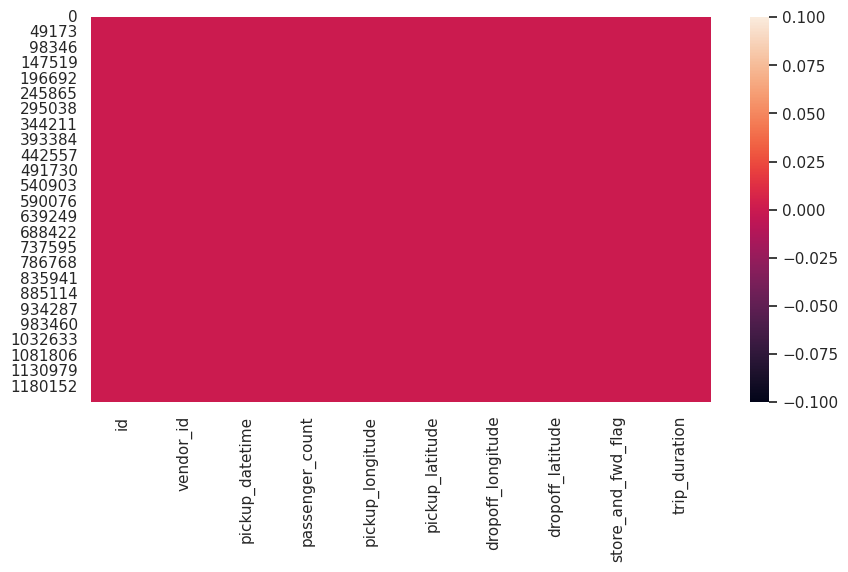

In [10]:
sns.heatmap(df.isna())

plt.show()

> Data Quality Check  

- The dataset is **clean**.  
- There are **no missing values** in any column.  


In [11]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [12]:
# Convert pickup_datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

## Data Types and Column Description  

- **id** → object (unique trip identifier).  
- **vendor_id** → int64 (taxi company code).  
- **pickup_datetime** → datetime64[ns] (start date and time of the trip).  
- **passenger_count** → int64 (number of passengers in the taxi).  
- **pickup_longitude** → float64 (longitude coordinate of the pickup location).  
- **pickup_latitude** → float64 (latitude coordinate of the pickup location).  
- **dropoff_longitude** → float64 (longitude coordinate of the dropoff location).  
- **dropoff_latitude** → float64 (latitude coordinate of the dropoff location).  
- **store_and_fwd_flag** → object (whether data was sent in real-time "N" or stored and forwarded "Y").  
- **trip_duration** → int64 (trip duration in seconds → **target variable**).  


# target variable analysis

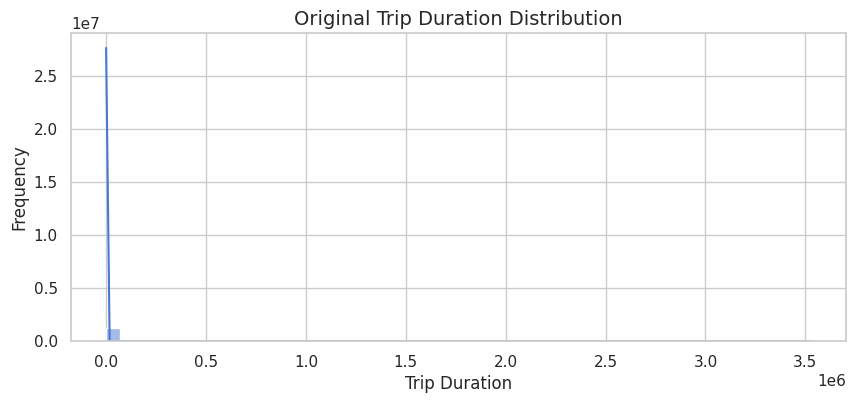

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title("Original Trip Duration Distribution")
plt.xlabel("Trip Duration")
plt.ylabel("Frequency")

plt.show()

> The x-axis, labeled "Trip Duration," ranges from 0.0 to 3.5 (in units of 1e6), while the y-axis, labeled "Frequency," ranges from 0.0 to 2.5 (in units of 1e7). The graph displays a strongly right-skewed distribution, featuring a sharp peak near a trip duration of 0.0, indicating a high concentration of data at lower values. The frequency declines rapidly beyond this peak, becoming nearly negligible as the trip duration exceeds 0.5, with only minimal data extending to the upper limit of 3.5.

In [15]:
# Log transformation
df['log_trip_duration'] = np.log1p(df['trip_duration'])  # log(1+x) to avoid log(0)

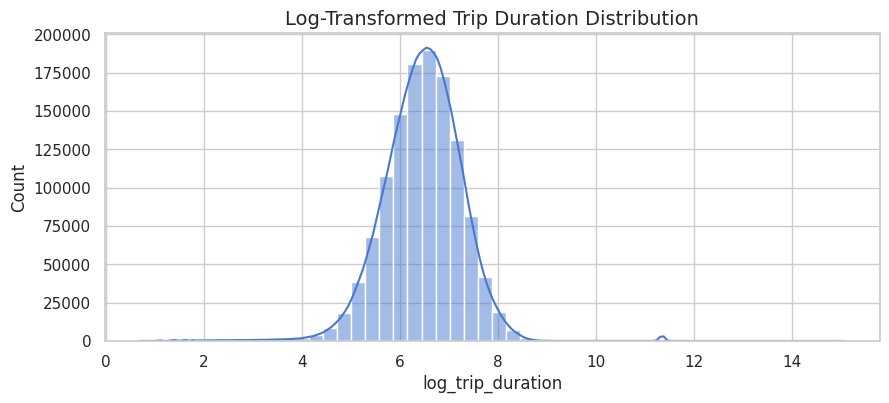

In [16]:
# After log transformation
plt.figure(figsize=(10,4))
sns.histplot(df['log_trip_duration'], bins=50, kde=True)
plt.title("Log-Transformed Trip Duration Distribution")

plt.show()

> Log-Transformed Trip Duration Distribution." The x-axis, labeled "log_trip_duration," ranges from 0 to 14, while the y-axis, labeled "Count," ranges from 0 to 200,000. The distribution forms a bell-shaped curve with a prominent peak around 6 to 8 on the x-axis, indicating the highest concentration of data points in this range. The count decreases symmetrically on both sides of the peak, tapering off to near-zero at the extremes (0 and 14), suggesting a roughly normal distribution after the logarithmic transformation.

In [17]:
# Check skewness before & after
print("Skewness before:", df['trip_duration'].skew())
print("Skewness after :", df['log_trip_duration'].skew())

Skewness before: 359.5138432739011
Skewness after : -0.2866252643273539


## Trip Duration Distribution  

- The **trip_duration** variable was originally **left-skewed**, meaning most trips had shorter durations but a few had very large values.  
- After applying a **log transformation**, the distribution became much closer to a **normal distribution**.  
- This transformation helps to reduce the effect of extreme outliers and makes the data more suitable for modeling.  


# univariate analysis

In [18]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [19]:
numerical_cols , categorical_cols

(Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
        'log_trip_duration'],
       dtype='object'),
 Index(['id', 'store_and_fwd_flag'], dtype='object'))

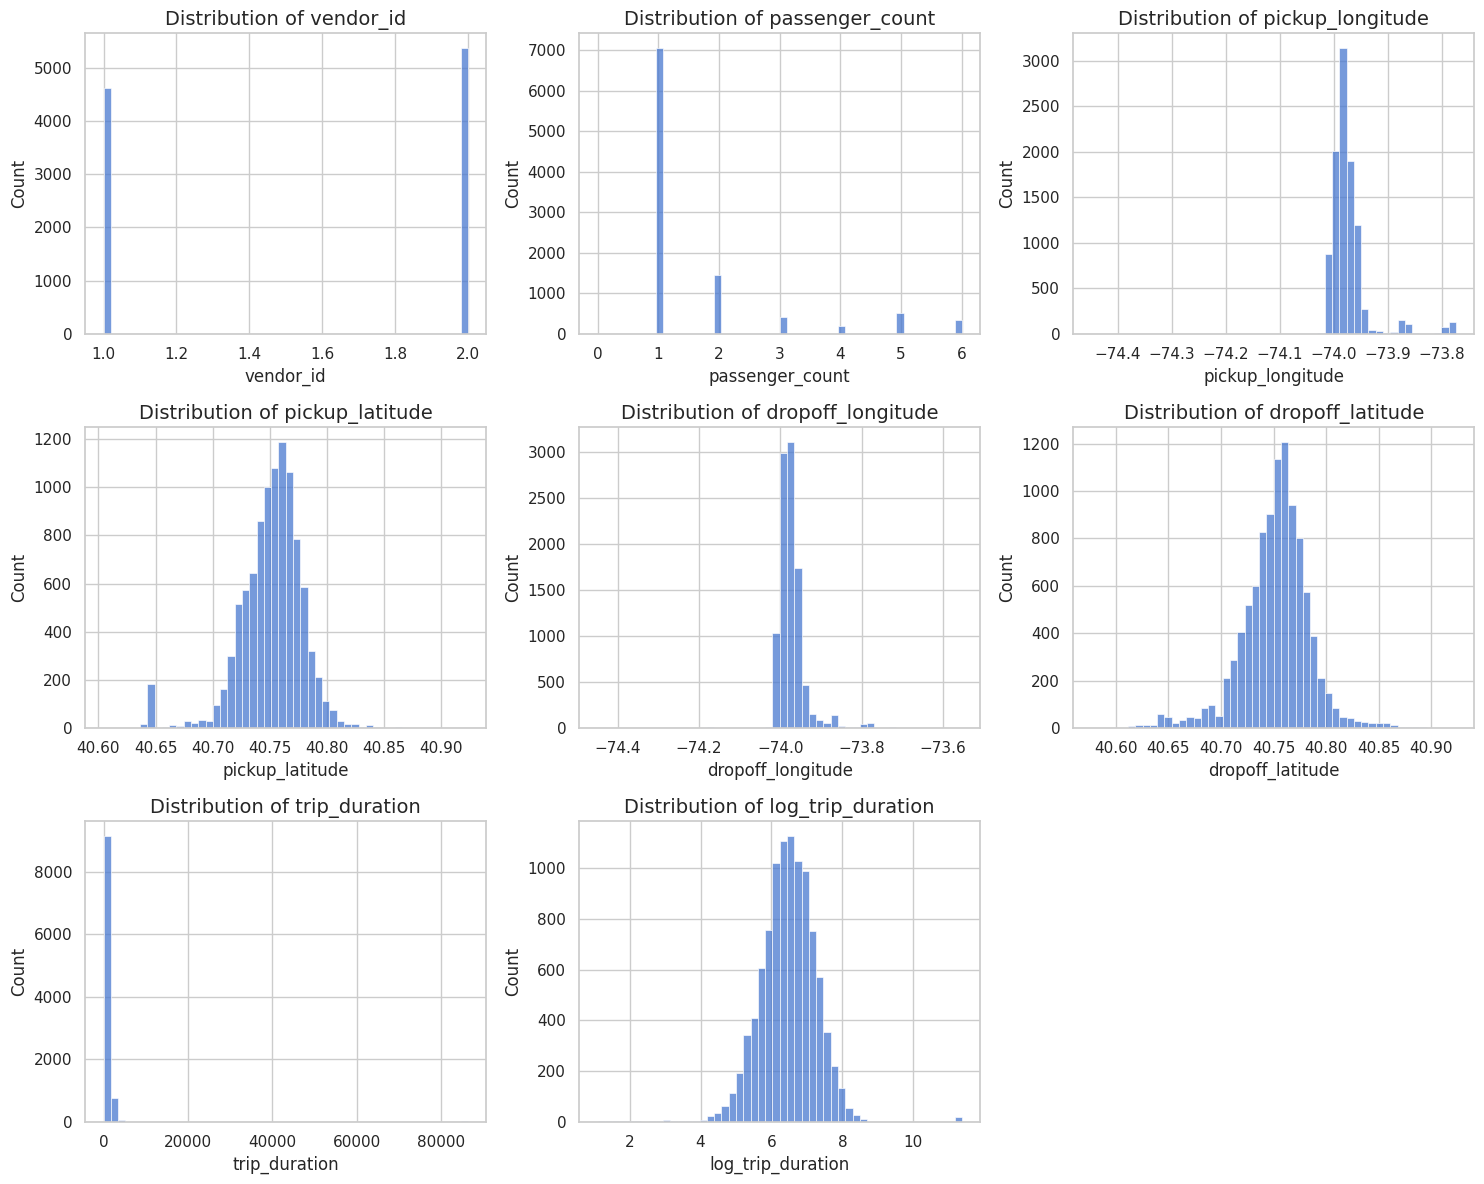

In [20]:
# Take a small sample of the data to speed up plotting
sample_df = df.sample(10000, random_state=42)  # 10k rows is enough

n = len(numerical_cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(sample_df[col], bins=50, kde=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove any empty axes if the grid is not completely filled
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



> 1. **Distribution of vendor_id (Vendor ID):**
   - The x-axis represents "vendor_id" and ranges from 1.0 to 2.0.
   - The y-axis represents "Count" and ranges from 0 to 5000.
   - You see two tall bars, one at 1.0 and one at 2.0, meaning there are just two types of vendors, each with a large number of trips (around 4000-5000 trips each).

> 2. **Distribution of passenger_count (Passenger Count):**
   - The x-axis represents "passenger_count" and ranges from 0 to 6.
   - The y-axis represents "Count" and ranges from 0 to 7000.
   - There’s a big peak at 1 (around 6000 trips), meaning most trips have one passenger, and the count drops quickly as the number of passengers increases.

> 3. **Distribution of pickup_longitude (Pickup Longitude):**
   - The x-axis represents "pickup_longitude" and ranges from -74.4 to -73.8.
   - The y-axis represents "Count" and ranges from 0 to 3000.
   - There’s a sharp peak around -73.9 to -74.0, meaning most trips start in a specific area of New York (these coordinates reflect that region).

> 4. **Distribution of pickup_latitude (Pickup Latitude):**
   - The x-axis represents "pickup_latitude" and ranges from 40.6 to 40.9.
   - The y-axis represents "Count" and ranges from 0 to 1000.
   - The distribution is centered around 40.75, meaning most trips start in a specific north-south range.

> 5. **Distribution of dropoff_longitude (Dropoff Longitude):**
   - The x-axis represents "dropoff_longitude" and ranges from -74.4 to -73.6.
   - The y-axis represents "Count" and ranges from 0 to 3000.
   - Similar to "pickup_longitude," there’s a sharp peak around -73.9 to -74.0.

> 6. **Distribution of dropoff_latitude (Dropoff Latitude):**
   - The x-axis represents "dropoff_latitude" and ranges from 40.6 to 40.9.
   - The y-axis represents "Count" and ranges from 0 to 1200.
   - The distribution is centered around 40.75, similar to "pickup_latitude".

> 7. **Distribution of trip_duration (Trip Duration):**
   - The x-axis represents "trip_duration" and ranges from 0 to 80000 (seconds).
   - The y-axis represents "Count" and ranges from 0 to 8000.
   - There’s a sharp peak near zero, meaning most trips are very short, and the count drops quickly afterward.

> 8. **Distribution of log_trip_duration (Log-Transformed Trip Duration):**
   - The x-axis represents "log_trip_duration" and ranges from 0 to 10.
   - The y-axis represents "Count" and ranges from 0 to 1000.
   - Here, the distribution becomes smoother and bell-shaped, with a peak around 6-8, meaning the logarithmic transformation helps make the distribution more balanced.

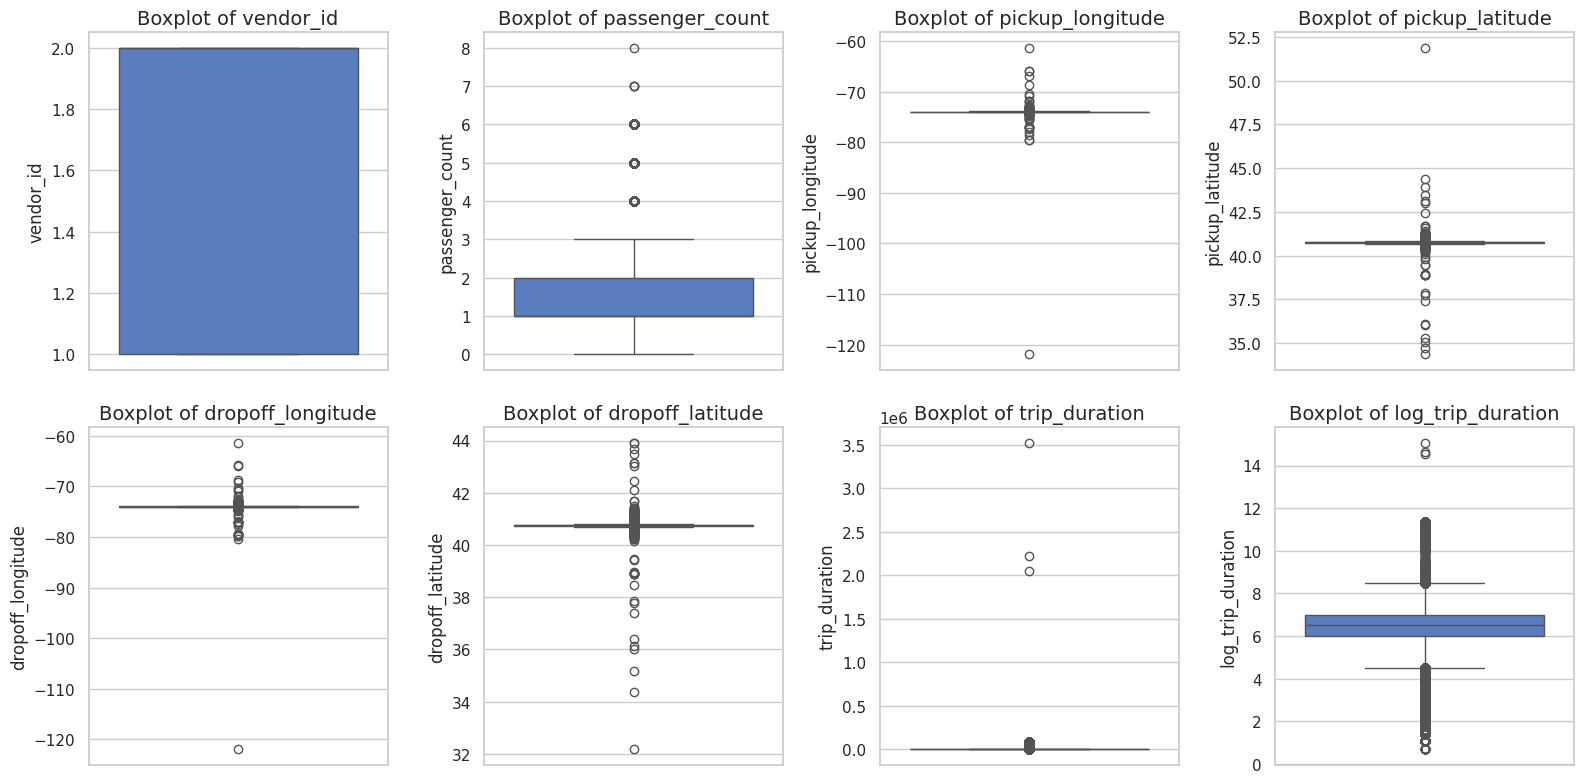

In [21]:
# Number of numerical features
n = len(numerical_cols)

# Create a grid (for example: 2 rows × 4 columns depending on feature count)
fig, axes = plt.subplots(2, (n+1)//2, figsize=(16,8))
axes = axes.flatten()

# Plot each numerical feature in its own boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide empty subplots if the grid is not completely filled
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


>1. **Boxplot of vendor_id (Vendor ID):**
   - The x-axis represents "vendor_id" and ranges from 1.0 to 2.0.
   - The y-axis isn’t labeled here, but it shows the count or frequency.
   - You see a single wide box covering the range from about 1.2 to 1.8, with no whiskers or outliers, meaning the data is mostly concentrated between these two vendor IDs (likely 1 and 2).

> 2. **Boxplot of passenger_count (Passenger Count):**
   - The x-axis represents "passenger_count" and ranges from 0 to 8.
   - The y-axis isn’t labeled, but it shows the count or frequency.
   - The box is centered around 1 to 2, with the median around 1, and there are some dots above (outliers) up to 6 or 7, showing that most trips have 1 or 2 passengers, with rare cases of more.

> 3. **Boxplot of pickup_longitude (Pickup Longitude):**
   - The x-axis represents "pickup_longitude" and ranges from -60 to -120.
   - The y-axis isn’t labeled, but it shows the count or frequency.
   - The box is very narrow around -74, with whiskers extending slightly, and a few outliers, indicating most pickup longitudes are clustered around -74 (typical for New York).

> 4. **Boxplot of pickup_latitude (Pickup Latitude):**
   - The x-axis represents "pickup_latitude" and ranges from 35.0 to 52.5.
   - The y-axis isn’t labeled, but it shows the count or frequency.
   - The box is centered around 40.0 to 41.0, with whiskers and some outliers, meaning most pickups happen between 40 and 41 latitude (New York area).

> 5. **Boxplot of dropoff_longitude (Dropoff Longitude):**
   - The x-axis represents "dropoff_longitude" and ranges from -60 to -120.
   - The y-axis isn’t labeled, but it shows the count or frequency.
   - Similar to pickup longitude, the box is narrow around -74, with slight whiskers and a few outliers, showing dropoffs are also concentrated around -74.

> 6. **Boxplot of dropoff_latitude (Dropoff Latitude):**
   - The x-axis represents "dropoff_latitude" and ranges from 32 to 44.
   - The y-axis isn’t labeled, but it shows the count or frequency.
   - The box is centered around 40 to 41, with whiskers and some outliers, consistent with pickups, indicating dropoffs are also in the 40-41 latitude range.

> 7. **Boxplot of trip_duration (Trip Duration):**
   - The x-axis represents "trip_duration" and ranges from 0 to 3.5 (in 1e6 seconds).
   - The y-axis isn’t labeled, but it shows the count or frequency.
   - The box is very narrow near 0, with a long upper whisker and many outliers up to 3.5, meaning most trips are short, but some are much longer.

> 8. **Boxplot of log_trip_duration (Log-Transformed Trip Duration):**
   - The x-axis represents "log_trip_duration" and ranges from 0 to 14.
   - The y-axis isn’t labeled, but it shows the count or frequency.
   - The box is centered around 6 to 8, with whiskers and some outliers, showing that after a log transformation, the trip durations are more evenly distributed, with a median around 7.

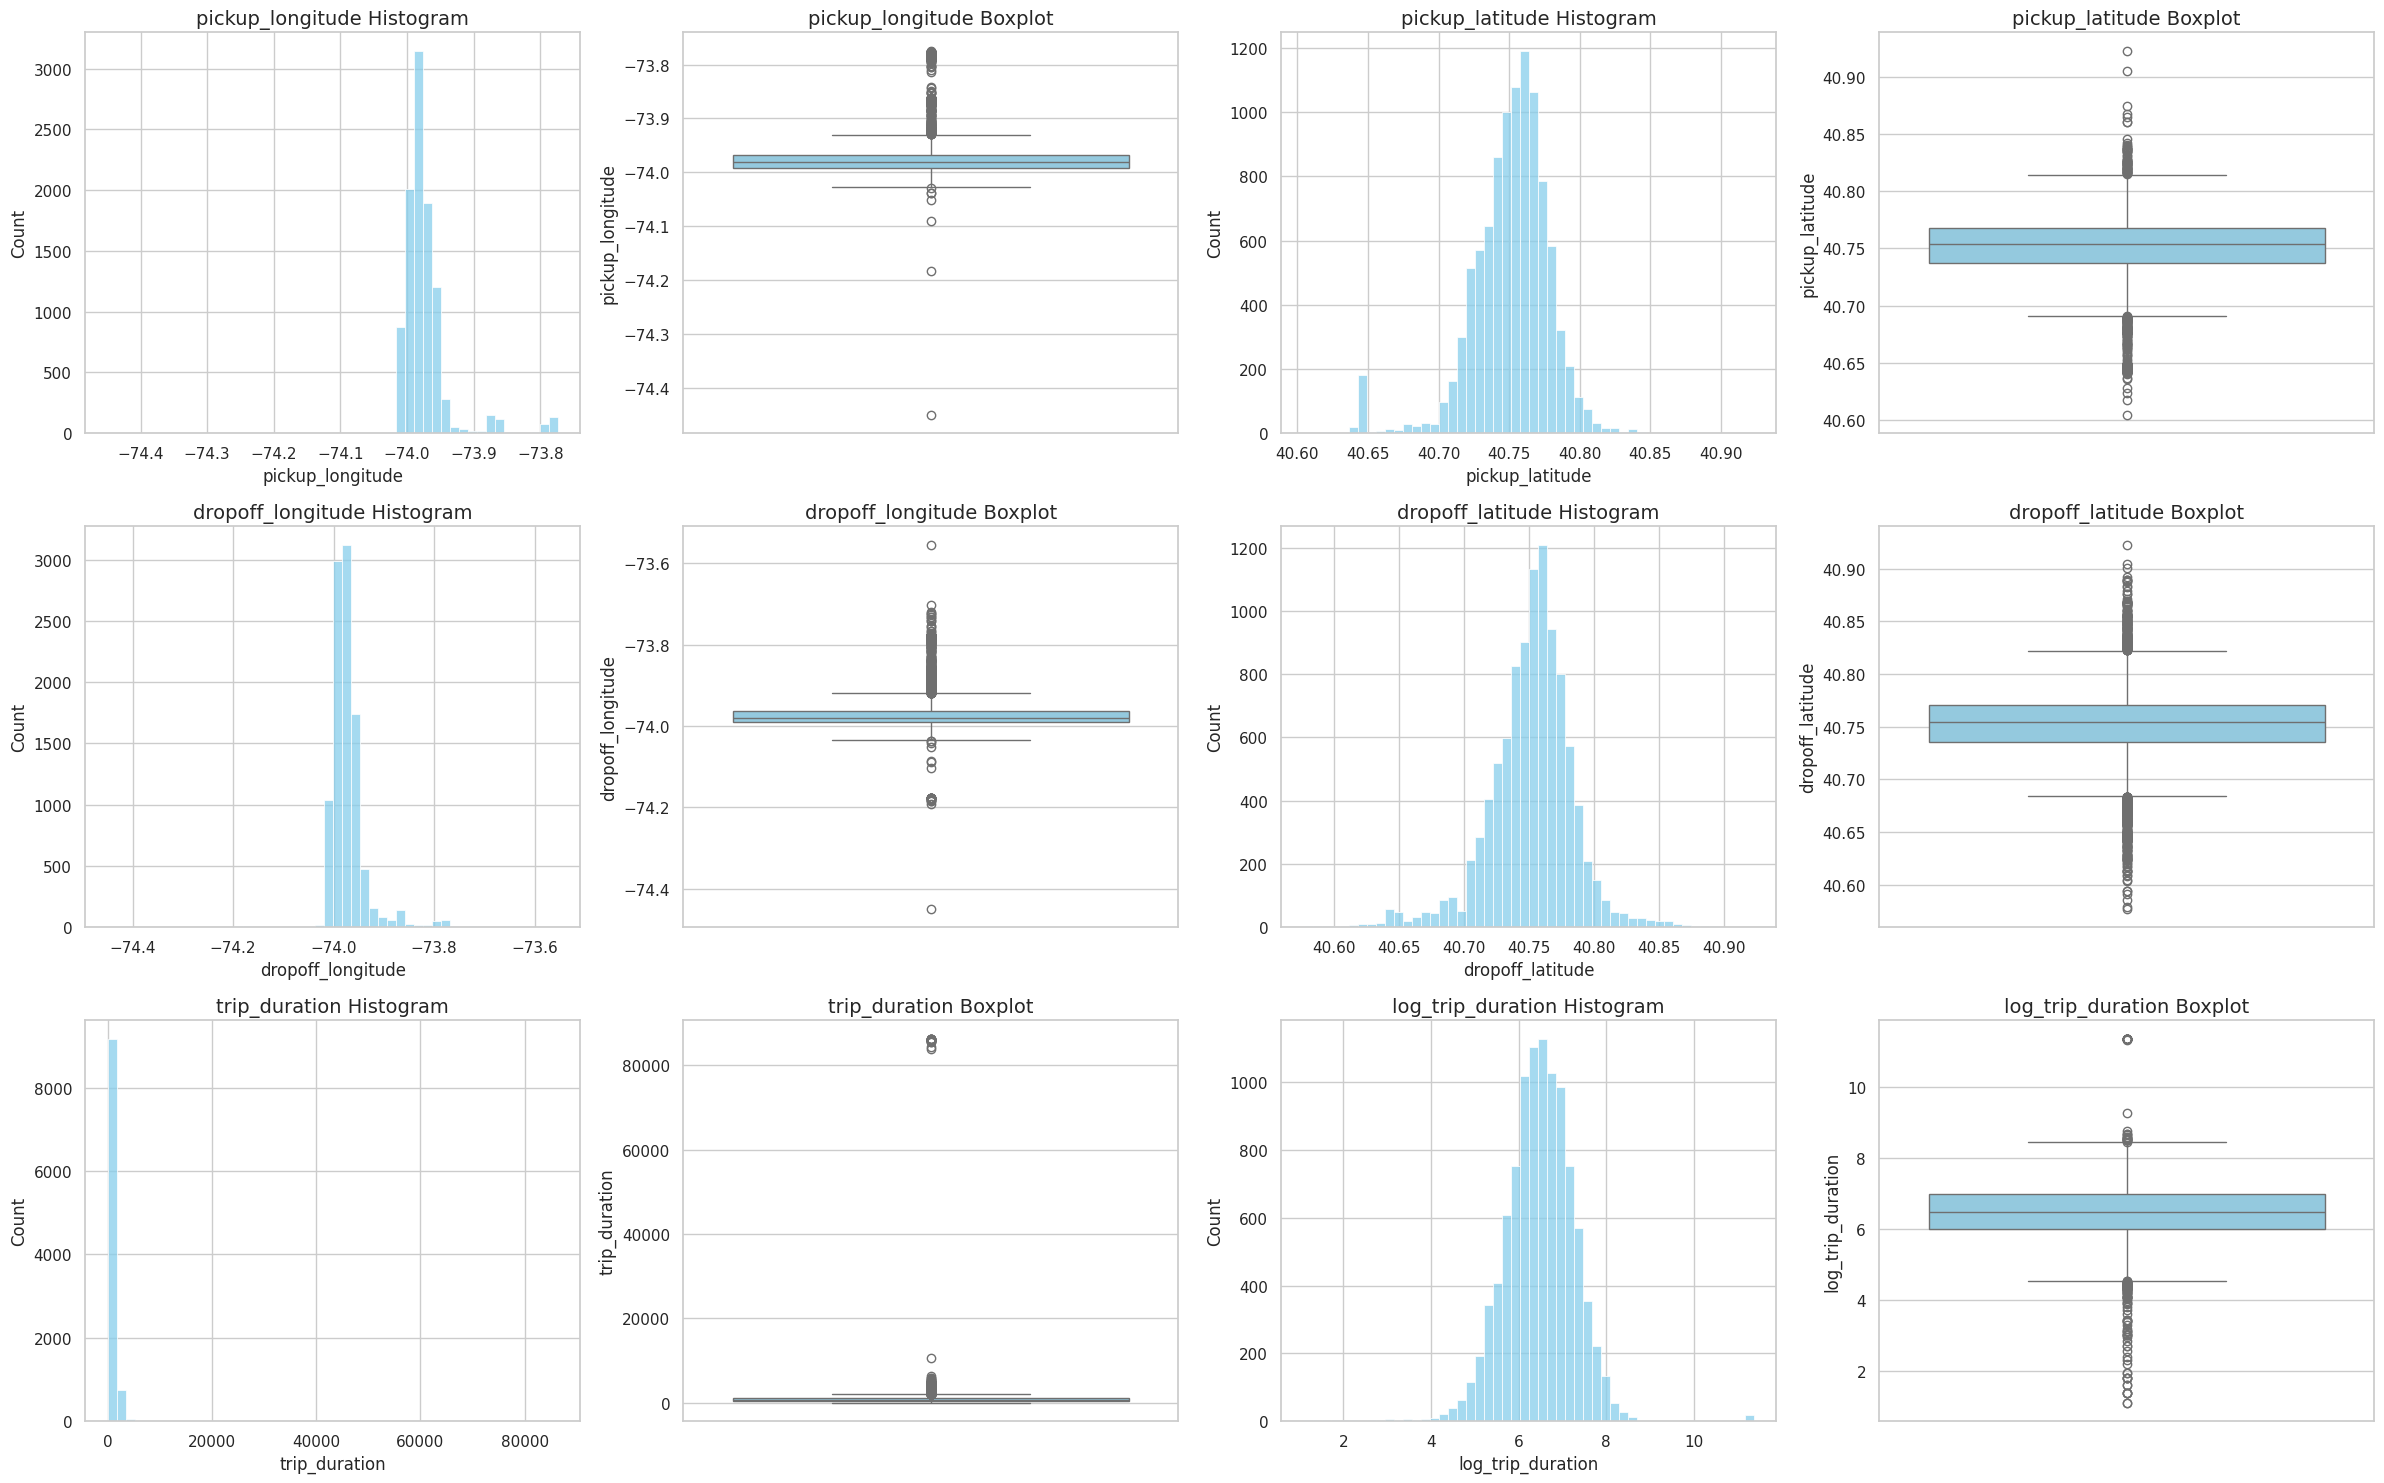

In [22]:
def plot_numerical_distributions(data, numerical_cols, sample_size=10000, ncols=2, color="skyblue"):
    """
    Plots histograms and boxplots for numerical features in a single figure grid.
    """
    # Sample the data if large
    if len(data) > sample_size:
        data = data.sample(sample_size, random_state=42)
    
    nplots = len(numerical_cols)
    nrows = math.ceil(nplots / ncols)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols*2, figsize=(6*ncols*2, 5*nrows))
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        # Histogram
        sns.histplot(data[col], bins=50, kde=False, ax=axes[i*2], color=color)
        axes[i*2].set_title(f"{col} Histogram")
        axes[i*2].set_xlabel(col)
        axes[i*2].set_ylabel("Count")
        
        # Boxplot
        sns.boxplot(y=data[col], ax=axes[i*2 + 1], color=color)
        axes[i*2 + 1].set_title(f"{col} Boxplot")
        axes[i*2 + 1].set_ylabel(col)
    
    # Remove unused axes
    for j in range(i*2 + 2, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()

    plt.show()

# Example usage
numerical_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 
                  'dropoff_latitude', 'trip_duration', 'log_trip_duration']

plot_numerical_distributions(df, numerical_cols)

> 1. **pickup_longitude (Pickup Longitude):**
   - **Histogram:** The x-axis ranges from -74.4 to -73.6, and the y-axis ("Count") ranges from 0 to 3000. There’s a sharp peak around -73.9 to -74.0, showing most pickups happen in this longitude range.
   - **Boxplot:** The x-axis ranges from -74.4 to -73.6. The box is narrow around -74.0, with whiskers and a few outliers, confirming the data is tightly clustered.

> 2. **pickup_latitude (Pickup Latitude):**
   - **Histogram:** The x-axis ranges from 40.6 to 40.9, and the y-axis ("Count") ranges from 0 to 1200. The peak is around 40.75, indicating most pickups occur here.
   - **Boxplot:** The x-axis ranges from 40.6 to 40.9. The box is centered around 40.75, with whiskers and some outliers, showing a concentrated distribution.

> 3. **dropoff_longitude (Dropoff Longitude):**
   - **Histogram:** The x-axis ranges from -74.4 to -73.6, and the y-axis ("Count") ranges from 0 to 3000. The peak is around -73.9 to -74.0, similar to pickups.
   - **Boxplot:** The x-axis ranges from -74.4 to -73.6. The box is narrow around -74.0, with whiskers and a few outliers, consistent with the histogram.

> 4. **dropoff_latitude (Dropoff Latitude):**
   - **Histogram:** The x-axis ranges from 40.6 to 40.9, and the y-axis ("Count") ranges from 0 to 1200. The peak is around 40.75, matching the pickup pattern.
   - **Boxplot:** The x-axis ranges from 40.6 to 40.9. The box is centered around 40.75, with whiskers and some outliers, similar to the pickup latitude.

> 5. **trip_duration (Trip Duration):**
   - **Histogram:** The x-axis ranges from 0 to 8000 (seconds), and the y-axis ("Count") ranges from 0 to 8000. There’s a sharp peak near 0, showing most trips are very short.
   - **Boxplot:** The x-axis ranges from 0 to 8000. The box is very narrow near 0, with a long upper whisker and many outliers, indicating some trips are much longer.

> 6. **log_trip_duration (Log-Transformed Trip Duration):**
   - **Histogram:** The x-axis ranges from 0 to 10, and the y-axis ("Count") ranges from 0 to 1000. The distribution is bell-shaped with a peak around 6-8, showing a more balanced spread after transformation.
   - **Boxplot:** The x-axis ranges from 0 to 10. The box is centered around 6-8, with whiskers and some outliers, confirming the data is more evenly distributed.

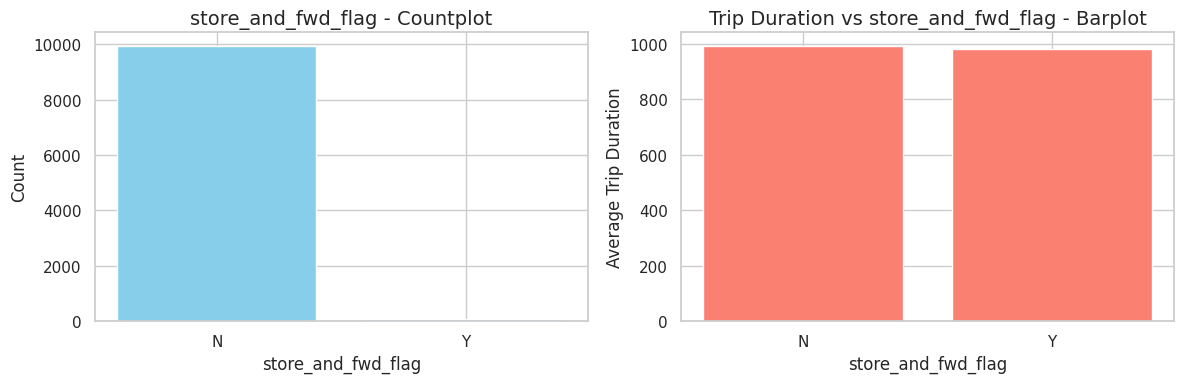

In [23]:
categorical_features = ['store_and_fwd_flag']  # skip 'id'

for cat in categorical_features:
    plt.figure(figsize=(12, 4))
    
    # Countplot
    counts = sample_df[cat].value_counts()
    plt.subplot(1, 2, 1)
    plt.bar(counts.index.astype(str), counts.values, color="skyblue")
    plt.title(f"{cat} - Countplot")
    plt.xlabel(cat)
    plt.ylabel("Count")
    
    # Barplot of mean target
    mean_df = sample_df.groupby(cat)['trip_duration'].mean()
    plt.subplot(1, 2, 2)
    plt.bar(mean_df.index.astype(str), mean_df.values, color="salmon")
    plt.title(f"Trip Duration vs {cat} - Barplot")
    plt.xlabel(cat)
    plt.ylabel("Average Trip Duration")
    plt.tight_layout()
    plt.show()

> 1. **Store and fwd_flag - Countplot (Left Chart):**
   - **Title:** "store_and_fwd_flag - Countplot"
   - **X-axis:** "store_and_fwd_flag" with two categories: "N" (No) and "Y" (Yes).
   - **Y-axis:** "Count" ranging from 0 to 10,000.
   - **What it shows:** This chart has one tall blue bar for "N" that reaches almost 10,000, and no bar for "Y". This means almost all trips (around 10,000) did not use the store and forward feature ("N"), while very few or none used it ("Y").

> 2. **Trip Duration vs store and fwd_flag - Barplot (Right Chart):**
   - **Title:** "Trip Duration vs store_and_fwd_flag - Barplot"
   - **X-axis:** "store_and_fwd_flag" with two categories: "N" and "Y".
   - **Y-axis:** "Average Trip Duration" ranging from 0 to 1000 (likely in seconds or another unit).
   - **What it shows:** This chart has two red bars of similar height, one for "N" and one for "Y", both around 800-1000. This suggests that the average trip duration is about the same whether the store and forward feature was used ("Y") or not ("N").

# bivariate analysis

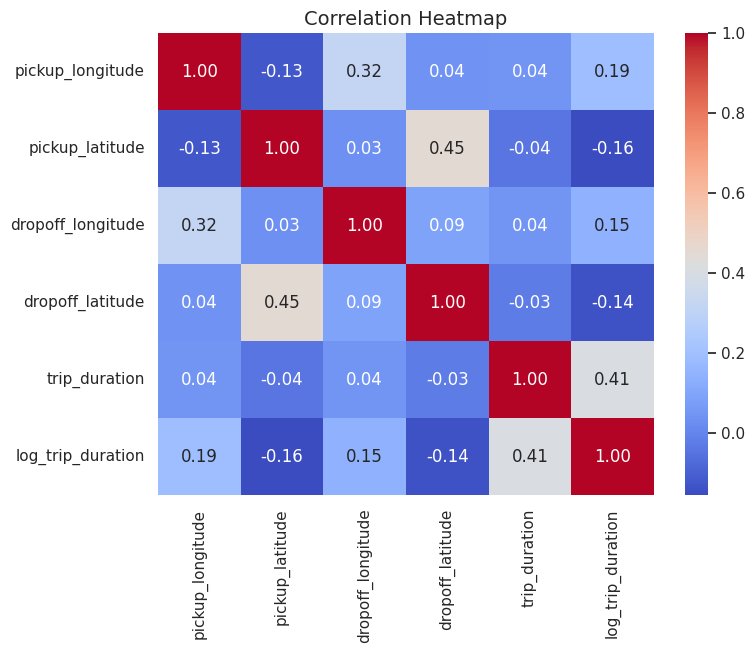

In [24]:
numerical_cols = ['pickup_longitude', 'pickup_latitude', 
                  'dropoff_longitude', 'dropoff_latitude', 
                  'trip_duration', 'log_trip_duration']

plt.figure(figsize=(8,6))
sns.heatmap(sample_df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

>- **1 or close to 1 (red):** Indicates a strong positive correlation (as one increases, the other does too).
>- **-1 or close to -1 (blue):** Indicates a strong negative correlation (as one increases, the other decreases).
>- **0 or close to 0 (gray):** Indicates no clear correlation.

>The variables are:
- **pickup_longitude** (pickup longitude)
- **pickup_latitude** (pickup latitude)
- **dropoff_longitude** (dropoff longitude)
- **dropoff_latitude** (dropoff latitude)
- **trip_duration** (trip duration)
- **log_trip_duration** (log-transformed trip duration)

>### Details:
1. **pickup_longitude and pickup_longitude:** 1.00 (perfect correlation with itself, as expected).
2. **pickup_longitude and pickup_latitude:** -0.13 (weak negative correlation).
3. **pickup_longitude and dropoff_longitude:** 0.32 (moderate positive correlation).
4. **pickup_latitude and pickup_latitude:** 1.00 (perfect correlation with itself).
5. **pickup_latitude and dropoff_latitude:** 0.45 (moderate positive correlation).
6. **trip_duration and log_trip_duration:** 0.41 (moderate positive correlation, though the log transformation adjusts the distribution).

>### Observations:
- Strong correlations are shown with dark colors (red or blue).
- Most correlations between variables are weak or moderate (close to 0), except for self-correlations (1.00).
- There is no strong correlation between trip duration (trip_duration) and the geographical coordinates.

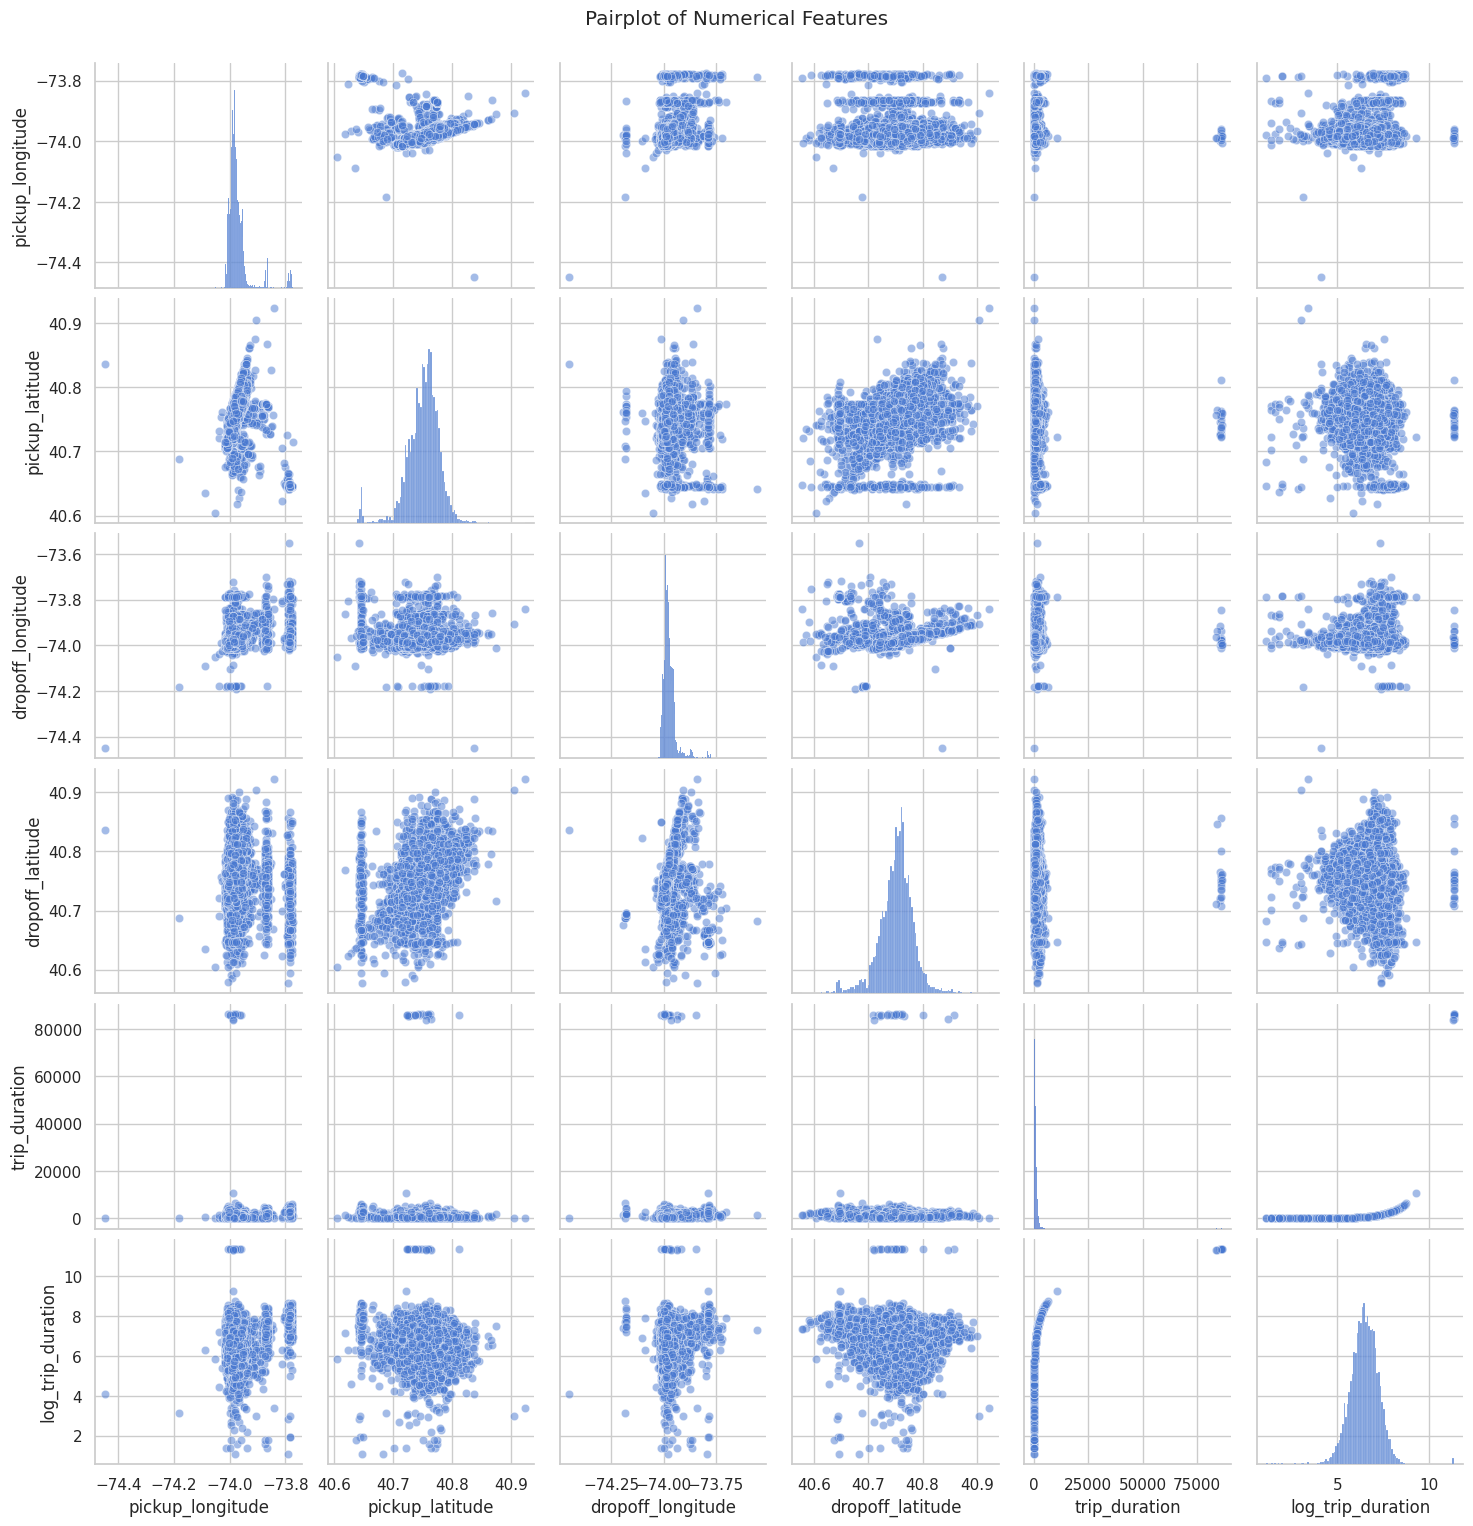

In [25]:
sns.pairplot(sample_df[numerical_cols], kind='scatter', diag_kind='hist', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


> Let’s break down this image step by step so anyone can understand it! This image is a "Pairplot of Numerical Features," which shows the relationships and distributions of different numerical variables related to trip data. It includes scatter plots and histograms to help you see how these variables interact. The variables are:

> - **pickup_longitude** (pickup longitude)
> - **pickup_latitude** (pickup latitude)
> - **dropoff_longitude** (dropoff longitude)
> - **dropoff_latitude** (dropoff latitude)
> - **trip_duration** (trip duration)
> - **log_trip_duration** (log-transformed trip duration)

> ### How to Read It:
> - The diagonal line (from top-left to bottom-right) shows histograms for each variable, indicating their individual distributions.
> - The off-diagonal sections show scatter plots, where each dot represents a pair of values from two variables, helping you see if they are related.

> ### Details:
> 1. **pickup_longitude (Top Row):**
>    - **Histogram:** Peaks sharply around -73.9 to -74.0, showing most pickups occur in this longitude range.
>    - **Scatter Plots:** Shows a dense cluster with other variables, especially with dropoff_longitude.

> 2. **pickup_latitude (Second Row):**
>    - **Histogram:** Peaks around 40.7 to 40.8, indicating most pickups happen in this latitude range.
>    - **Scatter Plots:** Dense clusters with dropoff_latitude, suggesting similar pickup and dropoff locations.

> 3. **dropoff_longitude (Third Row):**
>    - **Histogram:** Peaks around -73.9 to -74.0, similar to pickup_longitude.
>    - **Scatter Plots:** Correlates with pickup_longitude, showing a pattern.

> 4. **dropoff_latitude (Fourth Row):**
>    - **Histogram:** Peaks around 40.7 to 40.8, matching pickup_latitude.
>    - **Scatter Plots:** Aligns with pickup_latitude, indicating consistent dropoff areas.

> 5. **trip_duration (Fifth Row):**
>    - **Histogram:** Peaks near 0, with a long tail up to 80,000, meaning most trips are short, but some are very long.
>    - **Scatter Plots:** Shows little clear pattern with other variables.

> 6. **log_trip_duration (Bottom Row):**
>    - **Histogram:** Peaks around 6-8, with a more balanced shape after log transformation.
>    - **Scatter Plots:** Shows a slight relationship with trip_duration, but still scattered.

> ### Observations:
> - The histograms on the diagonal show the distribution of each variable (e.g., sharp peaks for latitudes and longitudes, skewed for trip_duration).
> - Scatter plots reveal clusters, especially between pickup and dropoff coordinates, suggesting trips often start and end in similar areas.
> - The log transformation of trip duration makes its distribution more normal, which is easier to analyze.

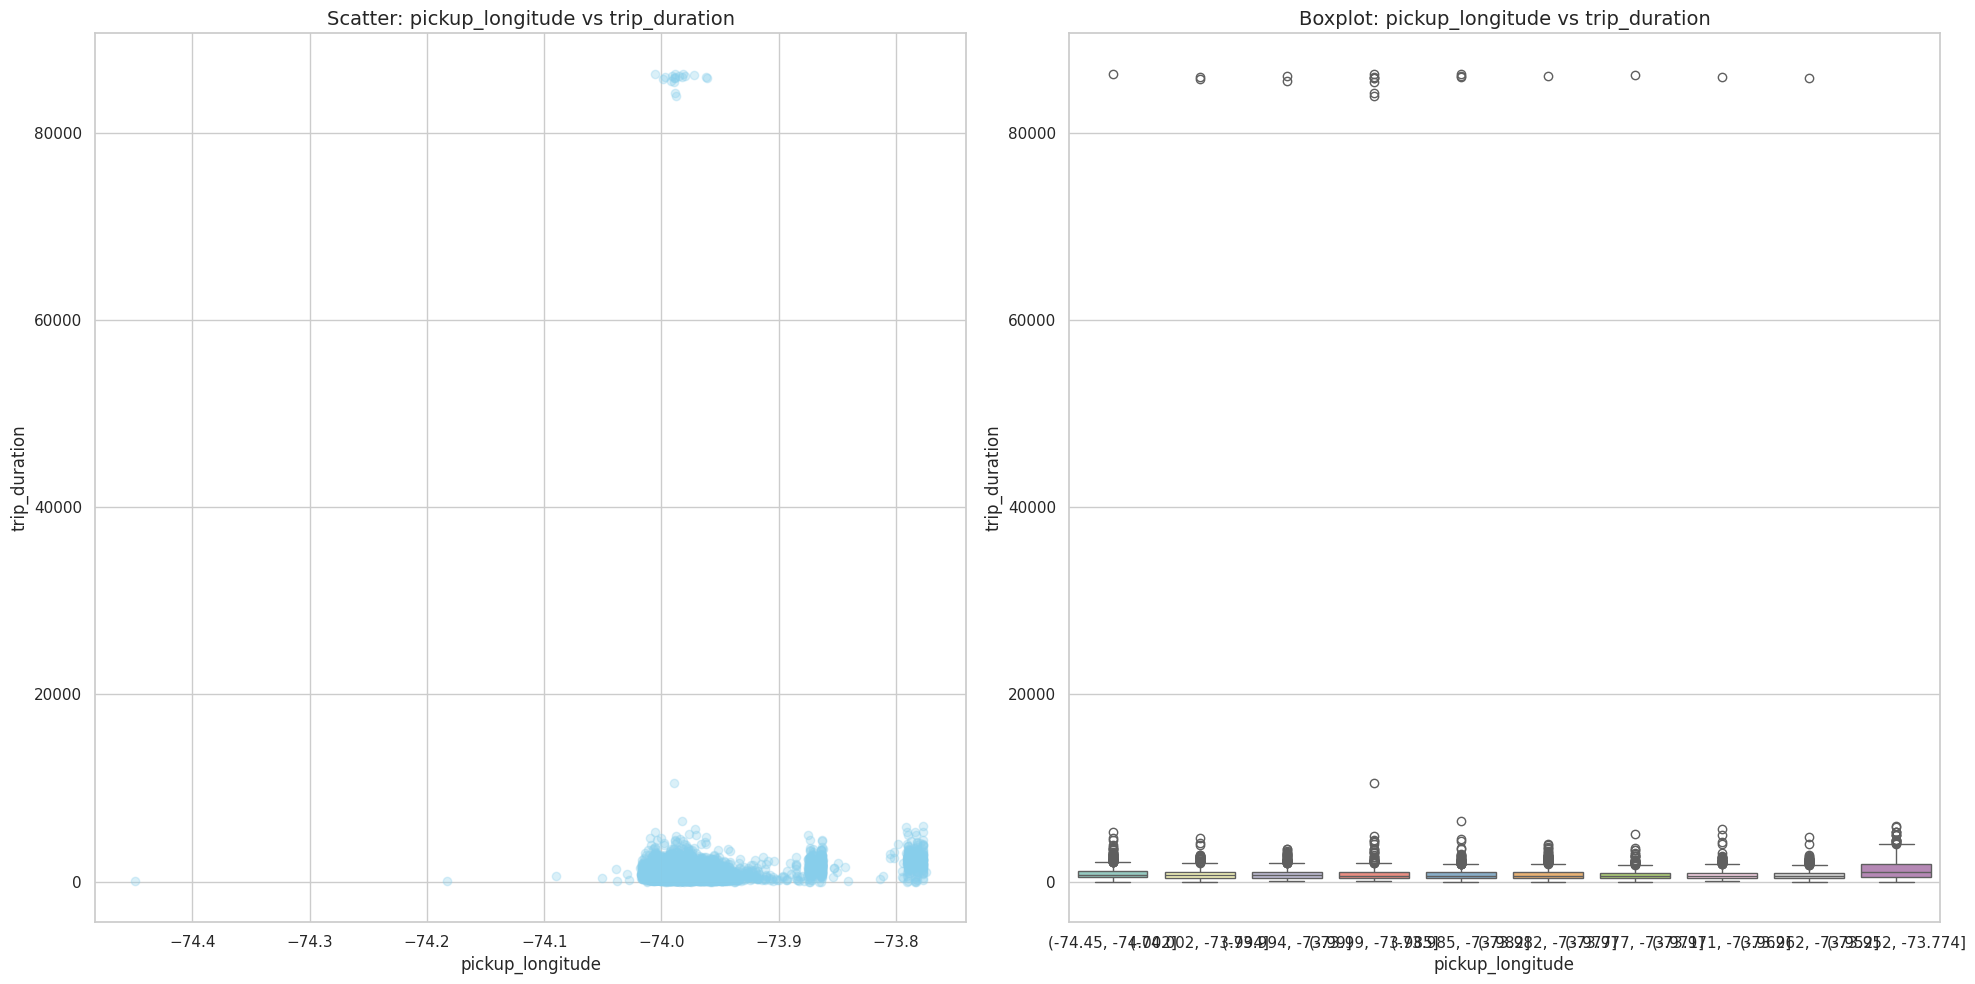

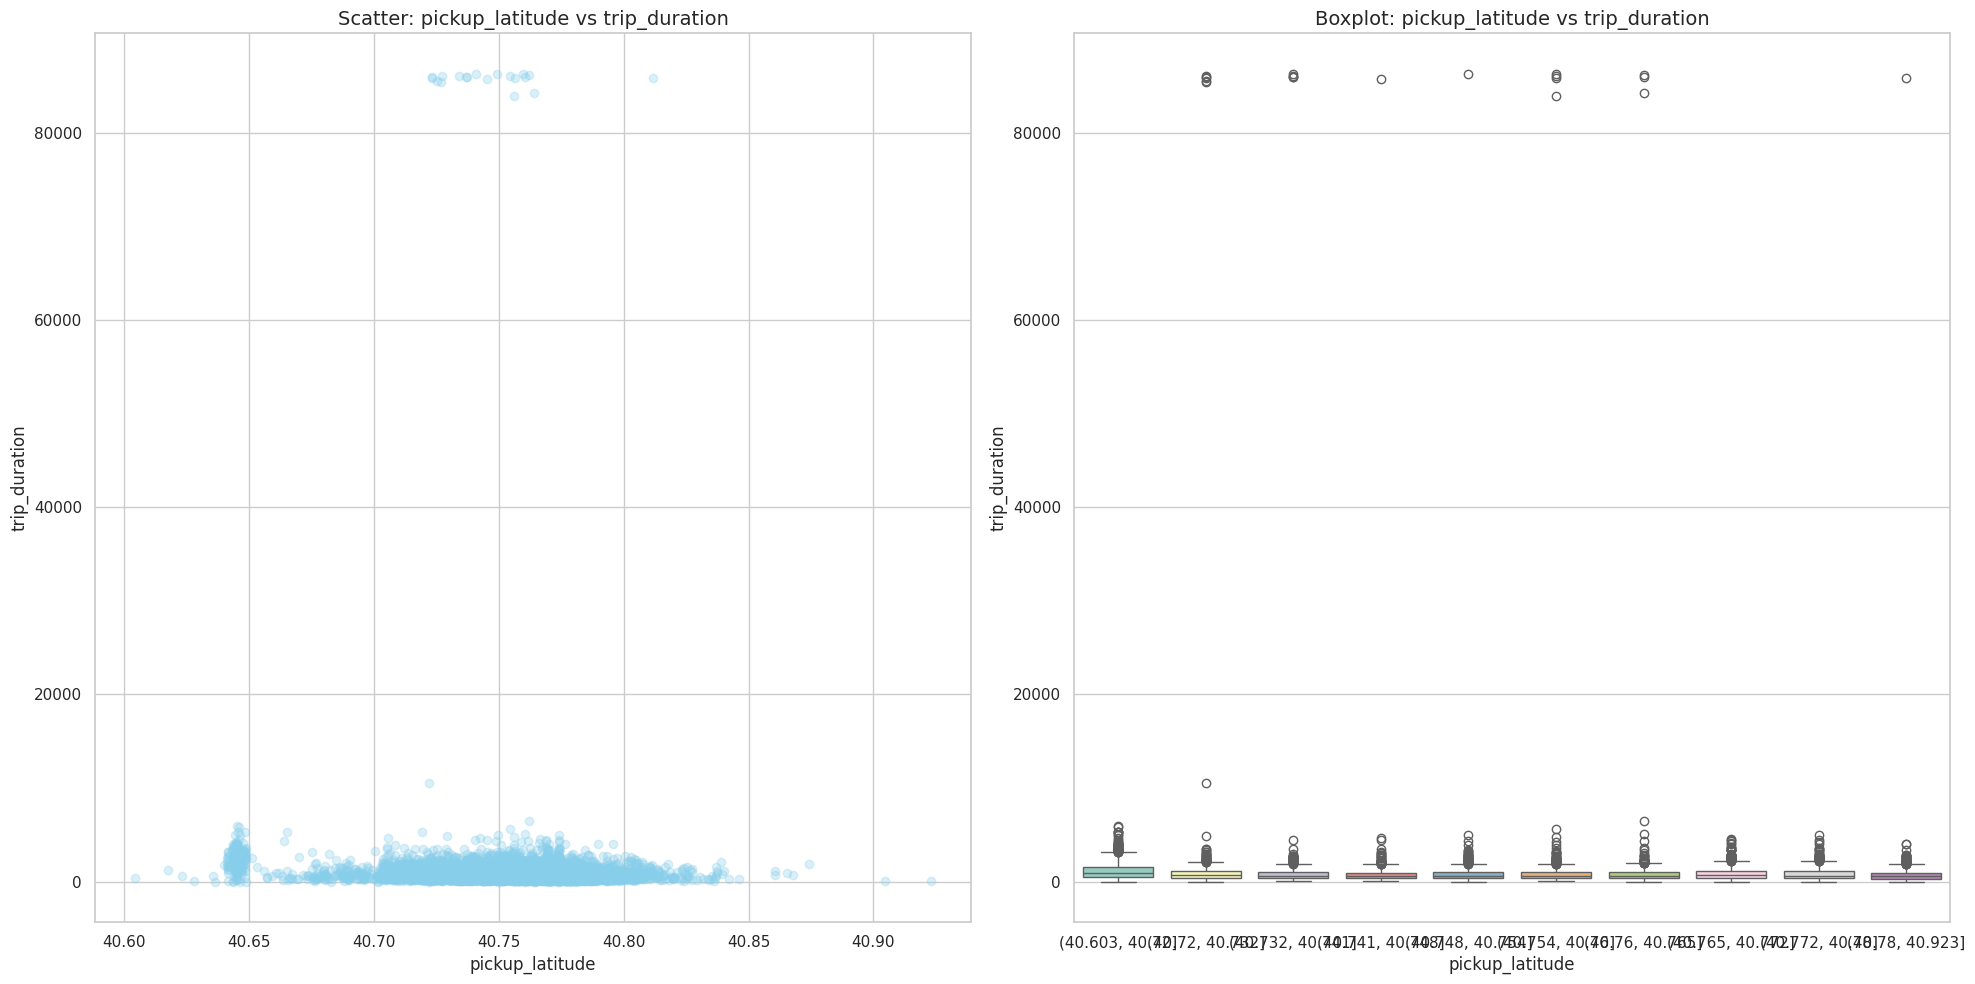

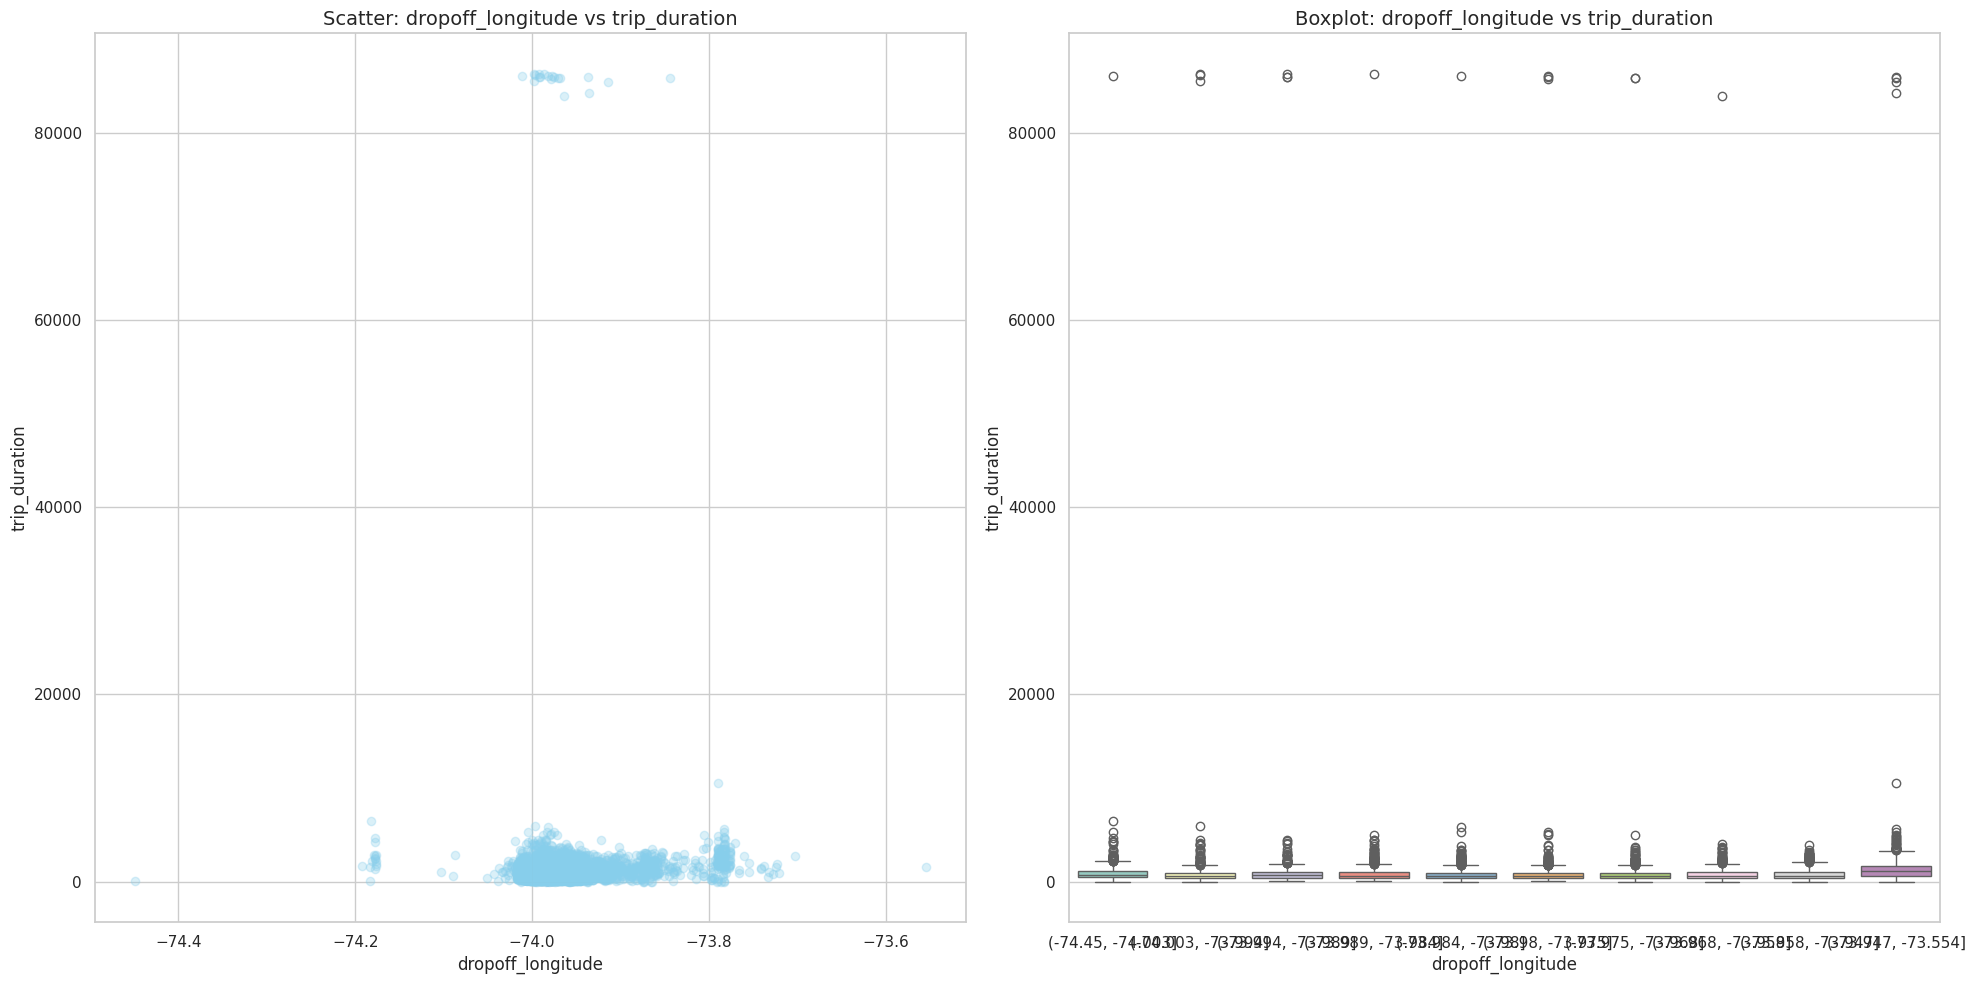

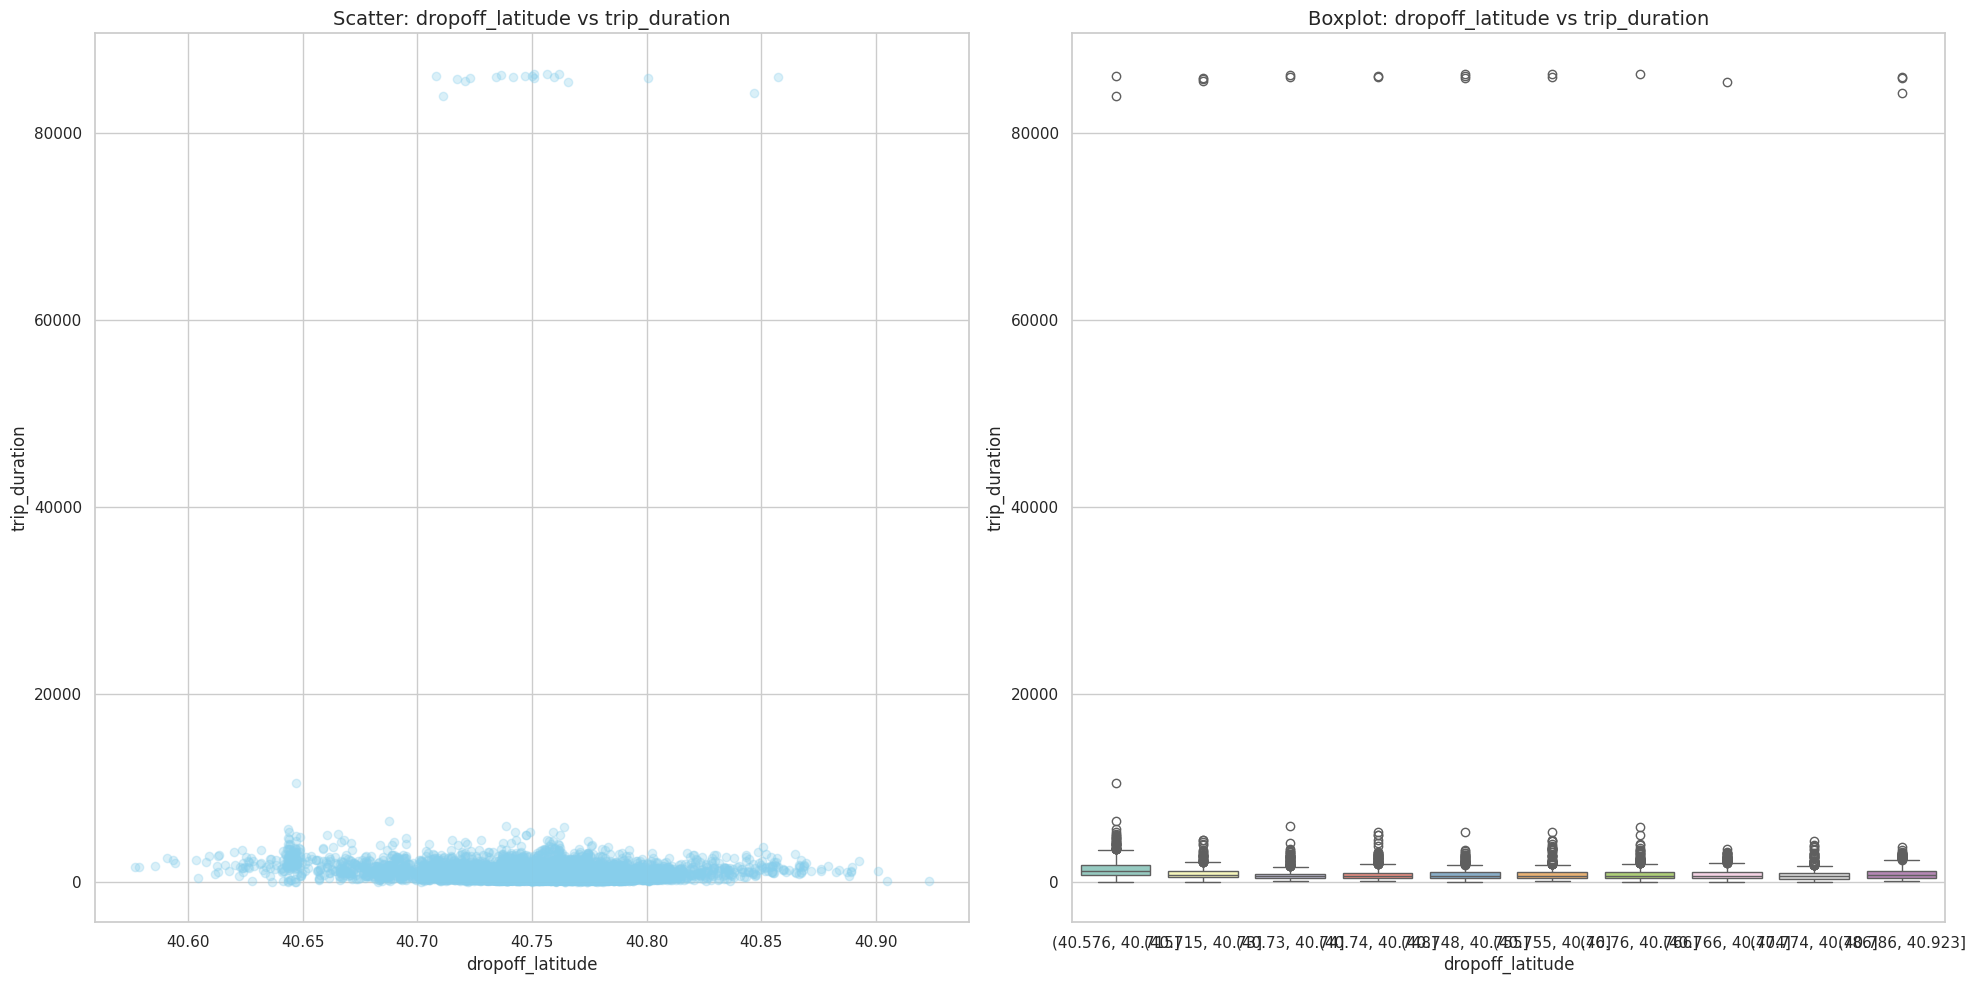

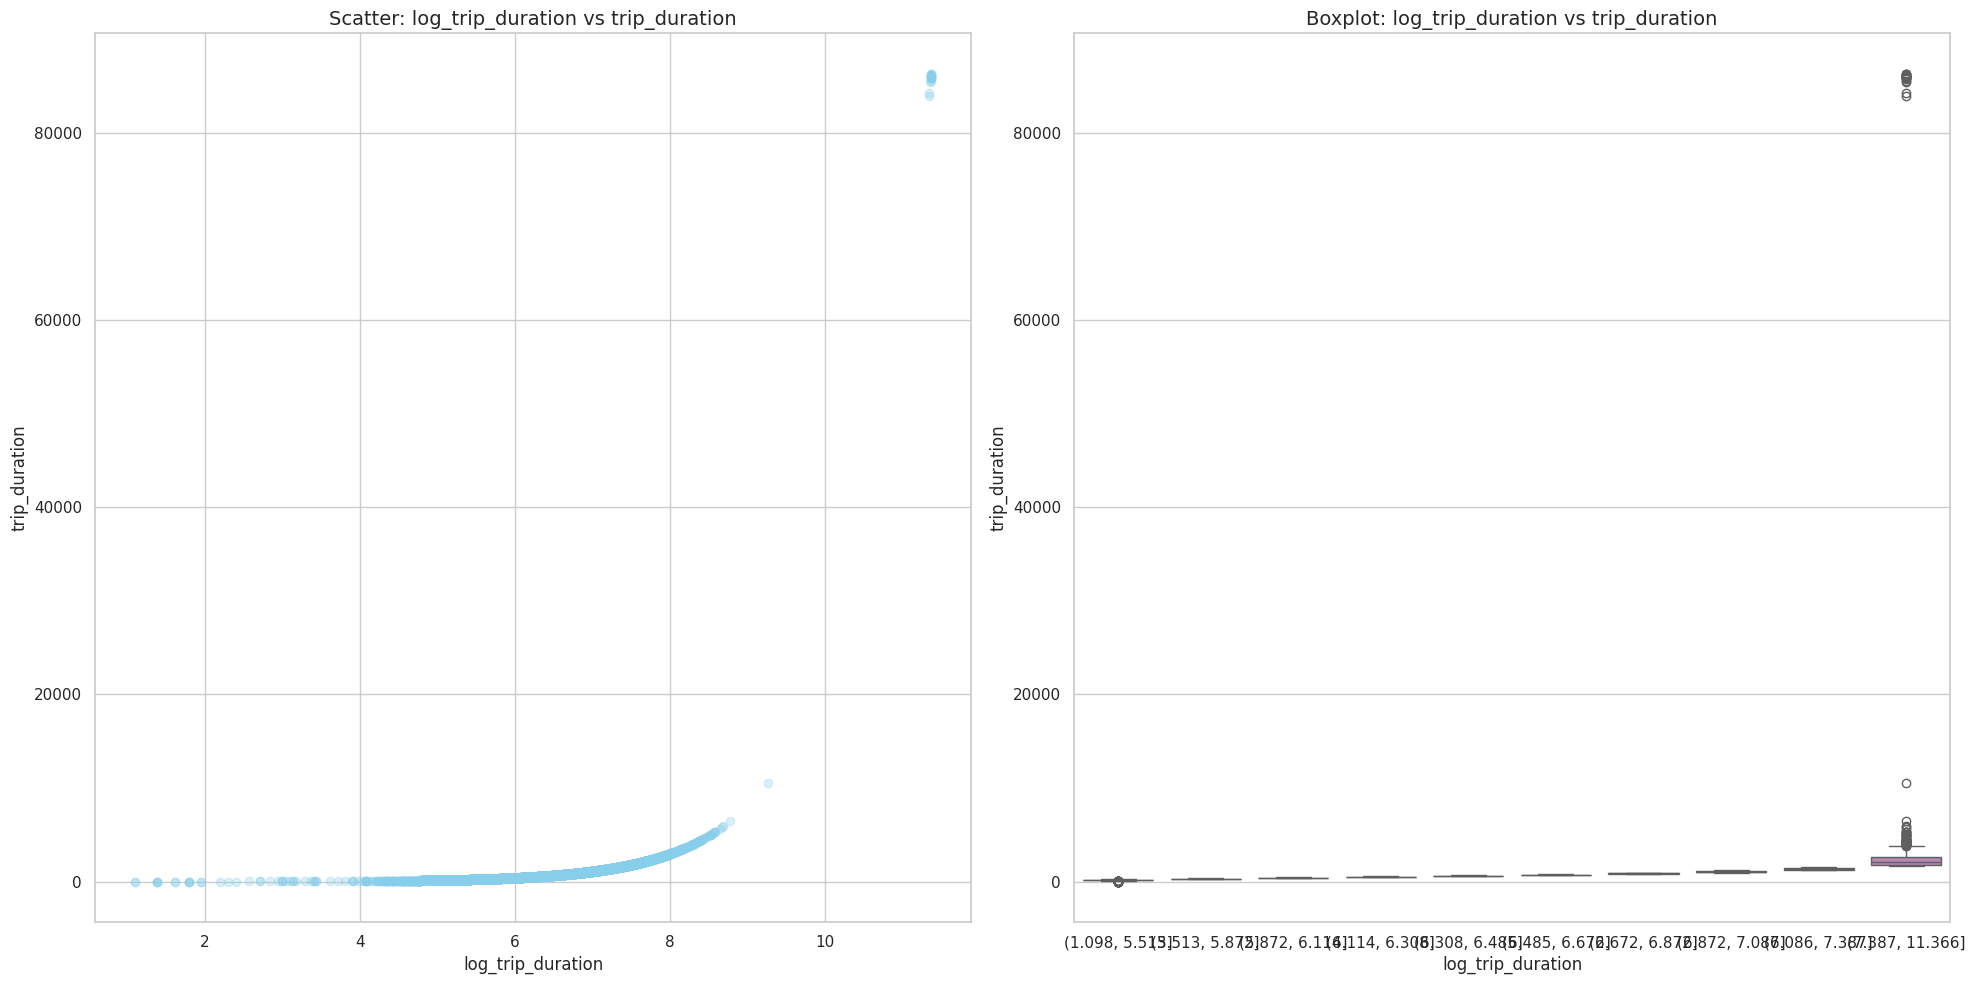

In [26]:
for col in numerical_cols:
    if col == 'trip_duration':
        continue
    
    plt.figure(figsize=(20,10))
    
    # Scatterplot
    plt.subplot(1,2,1)
    plt.scatter(sample_df[col], sample_df['trip_duration'], alpha=0.3, color='skyblue')
    plt.title(f"Scatter: {col} vs trip_duration")
    plt.xlabel(col)
    plt.ylabel("trip_duration")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=pd.qcut(sample_df[col], 10, duplicates='drop'), y=sample_df['trip_duration'], palette="Set3")
    plt.title(f"Boxplot: {col} vs trip_duration")
    plt.xlabel(col)
    plt.ylabel("trip_duration")
    plt.tight_layout()
    plt.show()

### 1. Scatter Plot (Left)
- **X-axis:** `log_trip_duration` (logarithmic transformation of trip duration).  
- **Y-axis:** `trip_duration` (actual trip time).  
- Most data points are clustered near the lower values of `trip_duration`, showing a **right-skewed distribution**.  
- A few **extreme outliers** exist with very high `trip_duration` (up to ~85,000 seconds).  
- Applying the log transformation spreads the data more evenly, making patterns easier to observe.

### 2. Boxplot (Right)
- **X-axis:** `log_trip_duration` (grouped).  
- **Y-axis:** `trip_duration`.  
- The boxplot highlights the **concentration of most trips at shorter durations** with many **outliers on the higher end**.  
- Outliers are very visible, confirming the presence of unusually long trips compared to the majority.  

### Insights
- The log transformation helps in **reducing skewness** and makes the distribution more interpretable.  
- There are **extreme outliers** in `trip_duration` that may need special handling (e.g., removal or capping) for modeling.  
- Most trips are short, but the few long trips dominate the scale when plotted on raw values.

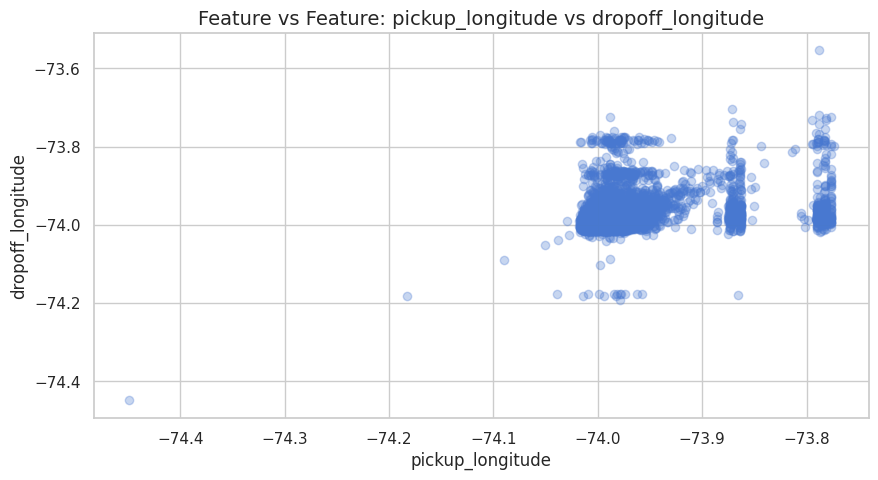

In [27]:
plt.scatter(sample_df['pickup_longitude'], sample_df['dropoff_longitude'], alpha=0.3)
plt.xlabel('pickup_longitude')
plt.ylabel('dropoff_longitude')
plt.title('Feature vs Feature: pickup_longitude vs dropoff_longitude')
plt.show()

- Each point represents a single taxi trip.  
- The dense cluster of points around `-74.0` to `-73.9` indicates that most pickups and dropoffs happen within a small range of longitude values (likely Manhattan).  
- A few points lie outside this range, which could represent outliers or trips to less common locations.  

> This visualization helps in detecting **geographical patterns** and identifying potential **outliers** in the trip data.  

# datetime features analysis

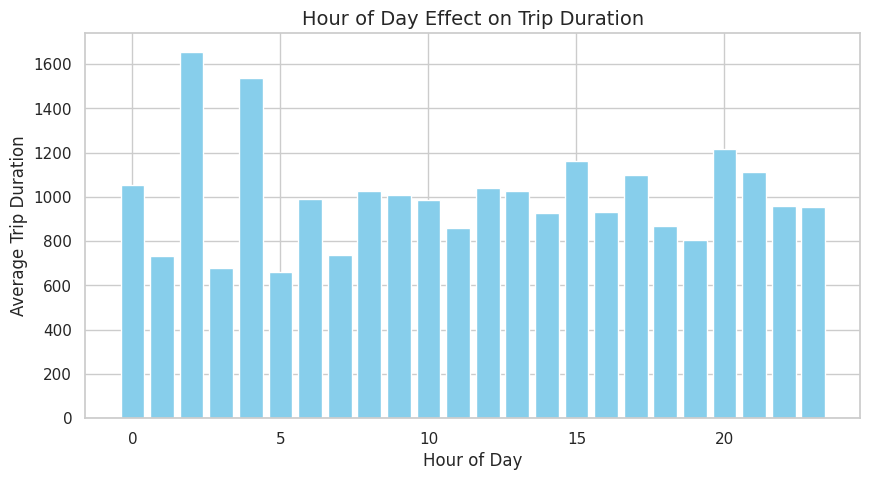

In [28]:
# Convert datetime and extract features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['weekday_weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Sample AFTER adding the new columns
sample_df = df.sample(10000, random_state=42)

# Now plotting works
plt.figure(figsize=(10,5))
hour_mean = sample_df.groupby('hour')['trip_duration'].mean()
plt.bar(hour_mean.index, hour_mean.values, color='skyblue')
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration")
plt.title("Hour of Day Effect on Trip Duration")
plt.show()

## Effect of Hour of Day on Trip Duration

- **X-axis:** Hour of the day (0–23).  
- **Y-axis:** Average trip duration.  
- The plot shows how trip duration varies depending on the hour.  

### Key Observations
- **Early morning hours (1–4 AM):** Trips have the highest average duration, peaking around hour 2 (~1650 seconds).  
- **Morning (6–10 AM):** Trip durations are relatively lower and more stable, with averages close to 1000 seconds.  
- **Afternoon (11 AM – 5 PM):** Slight fluctuations but generally stable around 900–1150 seconds.  
- **Evening (6–9 PM):** Trip durations rise again, peaking around 8 PM (~1200 seconds).  
- **Late night (10–11 PM):** Values decrease slightly but remain higher than early morning lows.  

### Insights
- Longer trip durations tend to occur **late at night and very early in the morning**, possibly due to less traffic but longer trip distances.  
- During **commuting hours (morning & afternoon)**, average durations are shorter and more consistent.  


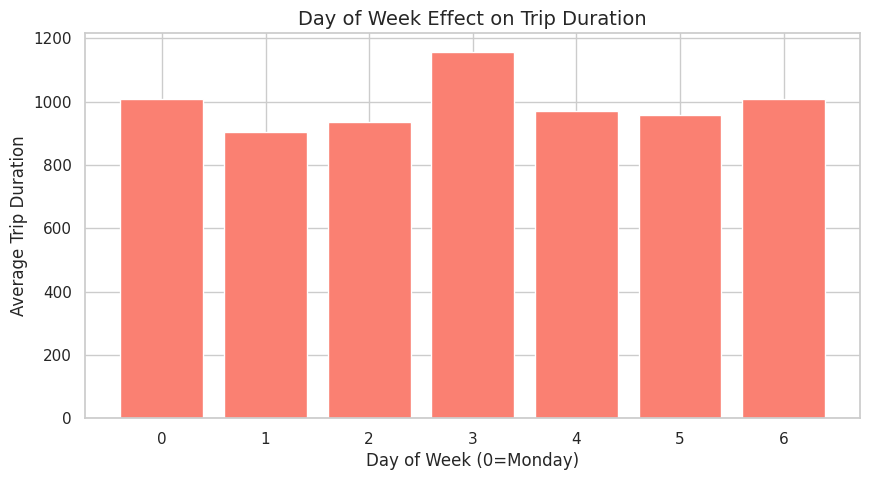

In [29]:
plt.figure(figsize=(10,5))
dow_mean = sample_df.groupby('day_of_week')['trip_duration'].mean()
plt.bar(dow_mean.index, dow_mean.values, color='salmon')
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Average Trip Duration")
plt.title("Day of Week Effect on Trip Duration")
plt.show()

## Effect of Day of Week on Trip Duration

- **X-axis:** Day of the week (0 = Monday, ..., 6 = Sunday).  
- **Y-axis:** Average trip duration.  
- The chart shows how trip duration varies by day of the week.  

### Key Observations
- **Wednesday (day 3):** Has the **highest average trip duration** (~1150 seconds).  
- **Tuesday (day 1):** Shows the **lowest average trip duration** (~900 seconds).  
- **Monday, Saturday, and Sunday (days 0, 5, 6):** Around ~1000 seconds, showing relatively higher durations compared to midweek.  
- **Thursday and Friday (days 4, 5):** Moderate durations (~950–970 seconds).  

### Insights
- Trip durations are **longest mid-week (Wednesday)**.  
- **Early-week trips (Tuesday)** are shorter on average, suggesting different travel behaviors (e.g., start-of-week routines).  
- Weekends (Saturday & Sunday) see trip durations closer to Monday, possibly reflecting leisure or longer-distance travel.  


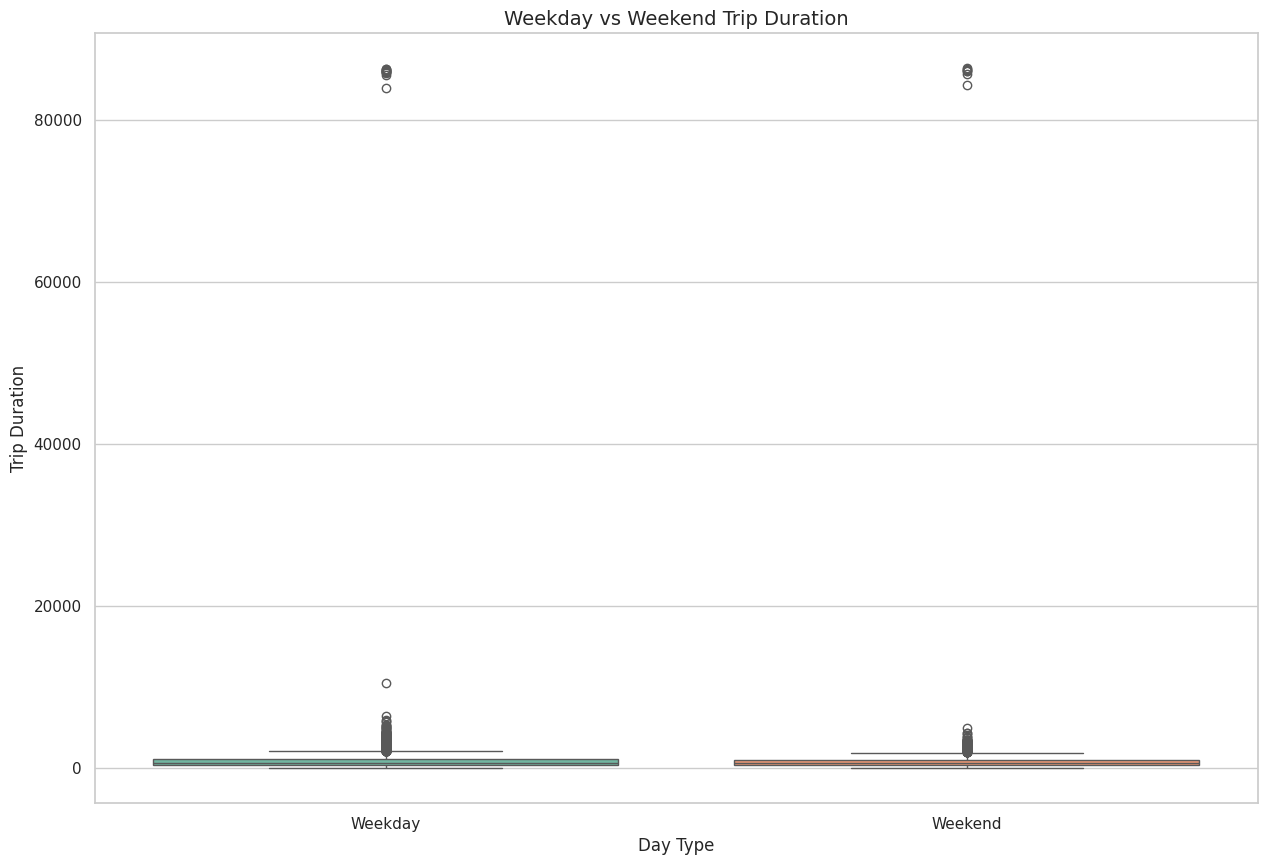

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(x='weekday_weekend', y='trip_duration', data=sample_df, palette="Set2")
plt.title("Weekday vs Weekend Trip Duration")
plt.xlabel("Day Type")
plt.ylabel("Trip Duration")
plt.show()

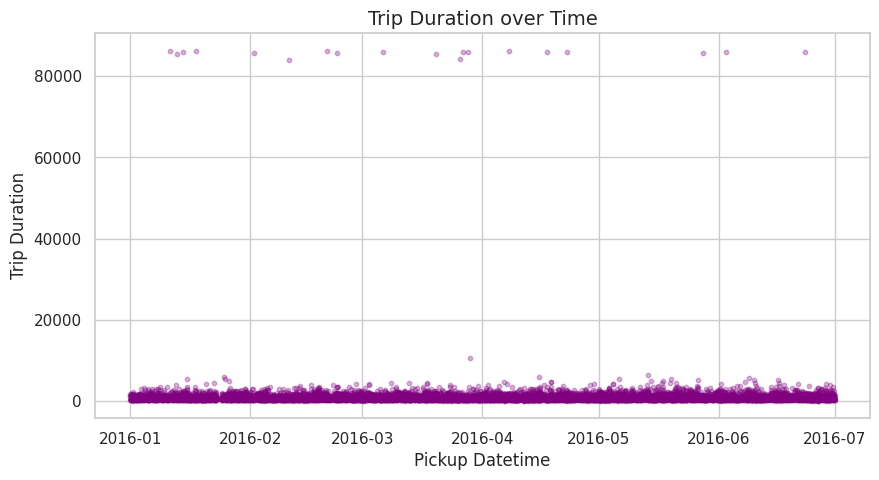

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(sample_df['pickup_datetime'], sample_df['trip_duration'], alpha=0.3, s=10, color='purple')
plt.xlabel("Pickup Datetime")
plt.ylabel("Trip Duration")
plt.title("Trip Duration over Time")
plt.show()

> Time  
Duration


# geospatial-analysis

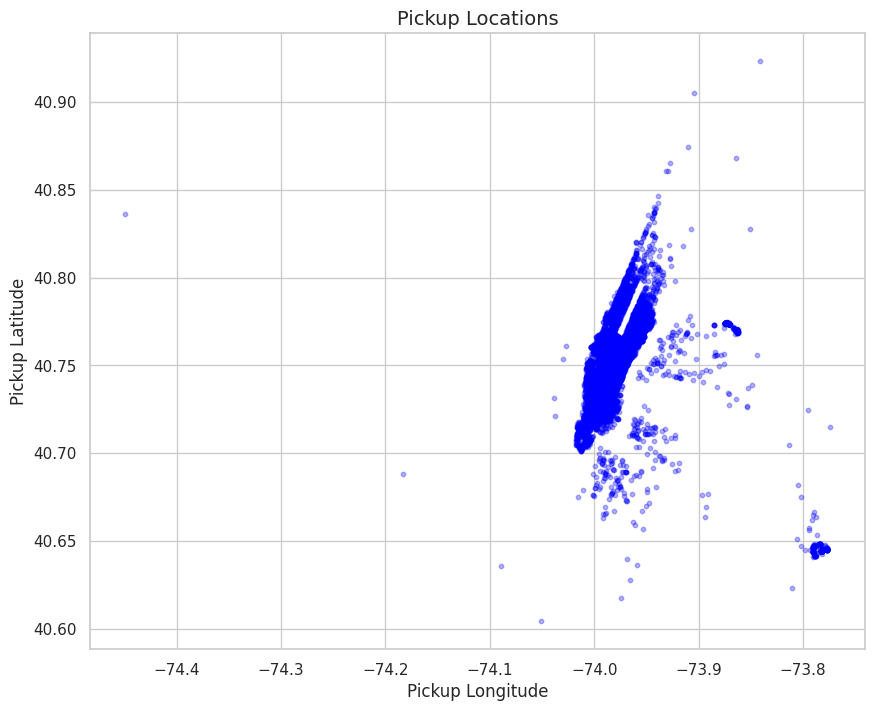

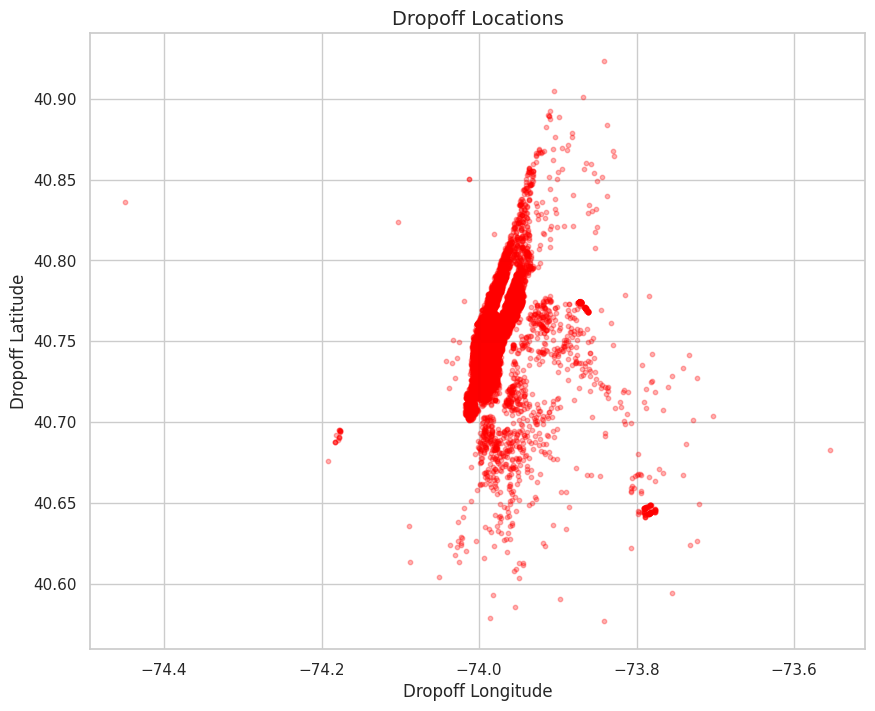

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(sample_df['pickup_longitude'], sample_df['pickup_latitude'], 
            alpha=0.3, s=10, c='blue')
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Pickup Locations")
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(sample_df['dropoff_longitude'], sample_df['dropoff_latitude'], 
            alpha=0.3, s=10, c='red')
plt.xlabel("Dropoff Longitude")
plt.ylabel("Dropoff Latitude")
plt.title("Dropoff Locations")

plt.show()

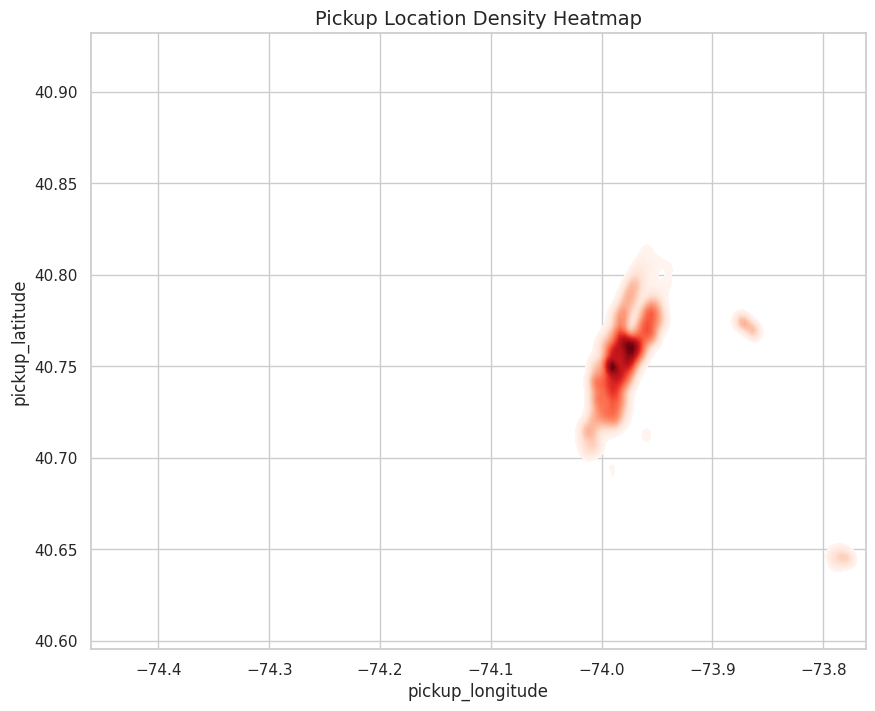

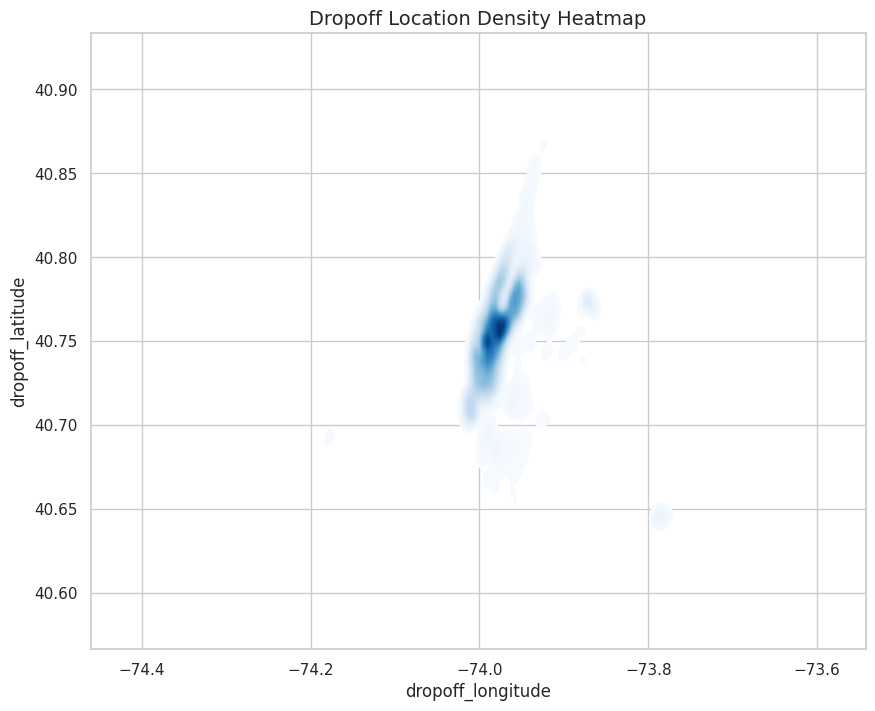

In [33]:
plt.figure(figsize=(10,8))
sns.kdeplot(
    x=sample_df['pickup_longitude'], 
    y=sample_df['pickup_latitude'], 
    fill=True, cmap='Reds', bw_adjust=0.5, levels=100
)
plt.title("Pickup Location Density Heatmap")
plt.show()

plt.figure(figsize=(10,8))
sns.kdeplot(
    x=sample_df['dropoff_longitude'], 
    y=sample_df['dropoff_latitude'], 
    fill=True, cmap='Blues', bw_adjust=0.5, levels=100
)
plt.title("Dropoff Location Density Heatmap")
plt.show()   

> Distance  
Duration


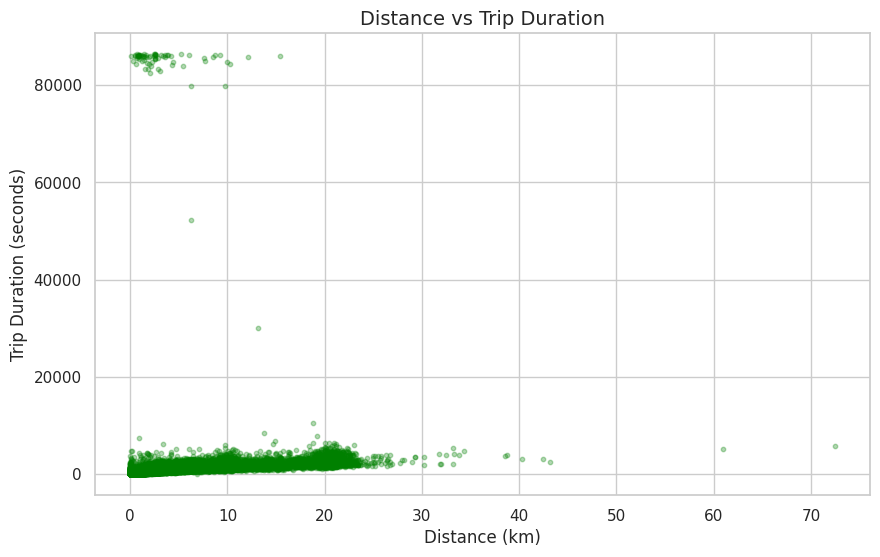

In [34]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    
    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Compute distance
df['distance_km'] = haversine_distance(df['pickup_latitude'], df['pickup_longitude'],
                                       df['dropoff_latitude'], df['dropoff_longitude'])

# Sample for speed
sample_df = df.sample(50000, random_state=42)

plt.figure(figsize=(10,6))
plt.scatter(sample_df['distance_km'], sample_df['trip_duration'], alpha=0.3, s=10, c='green')
plt.xlabel("Distance (km)")
plt.ylabel("Trip Duration (seconds)")
plt.title("Distance vs Trip Duration")
plt.show()


# Key Findings
- Target Variable (Trip Duration): The distribution of the trip_duration variable was initially highly left-skewed. After applying a logarithmic transformation, the distribution became very close to a normal distribution, making it more suitable for predictive models.

## Data Outliers:

- The maximum trip duration is approximately 40 days, which is an outlier and should be handled.

- Passenger records with 9 passengers are unrealistic, and there are also trips recorded with 0 passengers, raising questions about data quality.

## Numerical Features:

- Most trips (around 6000 trips) were for a single passenger, and the numbers decrease as the number of passengers increases.

- Most pickup and drop-off points are concentrated in a specific geographical area in New York (around longitude -74 and latitude 40.75).

## Categorical Features:

- There are two taxi companies (vendors) in the data, and it might be interesting to see if there are differences in speed or trip duration between them.

- There are no missing values or duplicate records in the data.

# Hypotheses for Feature Engineering
- Time and Date Variables: New features can be extracted from the pickup_datetime column, such as:

- Hour

- Day of the week

- Month

- Year

- Weekday vs. Weekend

- Geographical Features: The actual distance between pickup and drop-off points can be calculated using latitude and longitude   coordinates. This could be a strong indicator of trip_duration.

- Weather Impact: Weather (such as snow or rain) might affect trip duration. This external data could be added as a feature.

- Traffic Conditions: Rush hour can impact trip duration. A new feature could be engineered to identify if the trip occurred during rush hours.